<font font size=7, color='green'>Imporrting essential **packages** 

In [1]:
!pip install sklearn-genetic
import pickle 
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn import datasets, linear_model
from genetic_selection import GeneticSelectionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

     |████████████████████████████████| 153kB 6.8MB/s 
  Created wheel for sklearn-genetic: filename=sklearn_genetic-0.2-py2.py3-none-any.whl size=6695 sha256=5bf32935acb0b4552f58c1ec51362d27a48404fe933822dc00cd3b8cc7b14a11
  Stored in directory: /root/.cache/pip/wheels/e0/0d/a7/698bc5a79bdf76ad619116359c01dcc40298b8b275279fd826
Successfully built sklearn-genetic


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<font color='blue'>Let's upload data to **colab**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Dataset1.pkl to Dataset1.pkl
Saving label3.csv to label3.csv


<font font size=7, color='green'> Loading and preparing **dataset**

In [4]:
pickle_in = open("Dataset1.pkl","rb")
example_dict = pickle.load(pickle_in)
data=np.copy(example_dict)
print('data shape:', data.shape)

data shape: (40, 32, 315)


<font font size=5, color='red'> loading target<br>

In [0]:
a=pd.read_csv('label3.csv',index_col=None)
y=a['Label'].to_numpy()

<font font size=9, color='purple'> making dataset  by three methods<br>

<br>**Data** 1:

In [6]:
v=data[0,:,:].reshape(-1)
for i in range(1,40):
    v=np.vstack((v,data[i,:,:].reshape(-1)))
X1 = np.copy(v)
Y1 = y
print('data 1:', X1.shape)
print('label 1:', Y1.shape)

data 1: (40, 10080)
label 1: (40,)


**Data** 2:

In [7]:
arr3=np.empty([0,21])
for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]):
        for k in range(0,15):
            X3=data[i,j,21*k:21*(k+1)]
            arr3=np.vstack((arr3,X3))
X2 = arr3
Y2 = np.repeat(y,480)
print('data 2:', X2.shape)
print('label 2:', Y2.shape)

data 2: (19200, 21)
label 2: (19200,)


**Data** 3:

In [8]:
d=[]
c=data[:,:,0:21]
c = np.transpose(c,axes=[0,2,1])
c = c.reshape(40,-1)
for i in range(1,15):
    a=data[:,:,21*i:21*i+21]
    a = np.transpose(a,axes=[0,2,1])
    a = a.reshape(40,-1)
    c=np.vstack((c,a))
X3 = c
Y3 = np.repeat(y,15)
print('data 3:', X3.shape)
print('label 3:', Y3.shape)

data 3: (600, 672)
label 3: (600,)


<font font size=5, color='red'> Feature selection <br>

In [17]:
# def rfe(n_feature, clf, x, y):
#     rfe = RFE(estimator=clf, n_features_to_select=n_feature,step=1)
#     rfe.fit(x, y)
#     x_selected = rfe.transform(x)
#     return x_selected
# def genetic(clf, x, y):
#     g =  GeneticSelectionCV(clf, cv=5)
#     g.fit(x, y)
#     A = g.support_
#     idx = np.where(A==True)
#     return np.squeeze(x[:,idx], axis=1)

######################use  either mutual_info_classif or f_classif
def kbest(n_feature, x, y):
    kb = SelectKBest(f_classif, k=n_feature)
    kb.fit(x, y)
    x_selected = kb.transform(x)
    return x_selected
# kb_normal_X1 = kbest(100, normal_X1, Y1)
# kb_normal_X2 = kbest(5, normal_X2, Y2)
# kb_normal_X3 = kbest(7, normal_X3, Y3)
kb_X1 = kbest(100, X1, Y1)
kb_X2 = kbest(10, X2, Y2)
kb_X3 = kbest(100, X3, Y3)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [  301   302   303   304   305   306   307   308   309   310   311   312
   313   314   616   617   618   619   620   621   622   623   624   625
   626   627   628   629   931   932   933   934   935   936   937   938
   939   940   941   942   943   944  1246  1247  1248  1249  1250  1251
  1252  1253  1254  1255  1256  1257  1258  1259  1561  1562  1563  1564
  1565  1566  1567  1568  1569  1570  1571  1572  1573  1574  1876  1877
  1878  1879  1880  1881  1882  1883  1884  1885  1886  1887  1888  1889
  2191  2192  2193  2194  2195  2196  2197  2198  2199  2200  2201  2202
  2203  2204  2506  2507  2508  2509  2510  2511  2512  2513  2514  2515
  2516  2517  2518  2519  2821  2822  2823  2824  2825  2826  2827  2828
  2829  2830  2831  2832  2833  2834  3136  3137  3138  3139  3140  3141
  3142  3143  3144  3145  3146  3147  3148  3149  3451  3452  3453  3454
  3455  

<font font size=5, color='red'> Normalization<br>it's better not to use pca in classification

In [0]:
def data_cleaning(X):
    for i in range(0, X.shape[1]):
        X[:,i] = X[:, i] - np.mean(X[:,i])
        if(np.linalg.norm(X[:,i], 2)!=0):
            X[:,i] = X[:,i] / np.linalg.norm(X[:,i], 2)
    # pca = PCA(n_components=0.9)
    # pca.fit(X)
    # X = pca.transform(X)
    return X

kb_normal_X1 = data_cleaning(kb_X1)
kb_normal_X2 = data_cleaning(kb_X2)
kb_normal_X3 = data_cleaning(kb_X3)


# normal_X1 = data_cleaning(X1)
# normal_X2 = data_cleaning(X2)
# normal_X3 = data_cleaning(X3)

<font font size=5, color='red'>Classification methods<br>

In [0]:
mycv=KFold(n_splits=4, random_state=None, shuffle=False)
def SVM(kernel):
    parameters = {'C': [ 0.0001,0.001, 0.01, 0.1, 1, 10,100],'gamma':[0,1e-10,.0001,.001,.1,1,101,100]}
    model = SVC(kernel=kernel,  decision_function_shape='ovo')
    clf = GridSearchCV(model, parameters, cv=mycv)
    return clf
def logisticregression():
  parameters={'penalty':['l1', 'l2']}
  model = LogisticRegression(fit_intercept=True)
  clf = GridSearchCV(model, parameters, cv=mycv)
  return clf
def LDA():
  parameters={'solver':['svd','lsqr']}
  model=LinearDiscriminantAnalysis()
  clf=GridSearchCV(model, parameters, cv=mycv)
  return clf
def QDA():
  clf=QuadraticDiscriminantAnalysis()
  return clf
def AdaBoost():
    parameters1 = {'max_depth': [5,7,10]}
    parameters2 = {'n_estimators': [10,20,50,70,100,150]}
    model1 = DecisionTreeClassifier(criterion='entropy')
    base_clf = GridSearchCV(model1, parameters1, cv=mycv)
    model2 = AdaBoostClassifier(base_estimator = model1,learning_rate = 1)
    clf = GridSearchCV(model2, parameters2, cv=mycv)
    return clf
def random_forest():
    parameters = {'max_depth': [2,4,6,8,10,12], 'n_estimators': [10,20,40,60,80,100,150]}
    model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_features='sqrt')
    clf = GridSearchCV(model, parameters, cv=mycv)
    return clf
def KNN_clf():
    parameters = {'n_neighbors': [2, 4, 6, 8, 10, 15, 20]}
    model = KNeighborsClassifier()
    clf = GridSearchCV(model, parameters, cv=mycv, iid=False)
    return clf
def nn_clf():
    parameters = {'hidden_layer_sizes': [5, 10, 15, 20, 30]}
    model = MLPClassifier(solver='sgd',activation='relu',alpha=0.0001, batch_size=10, learning_rate='constant',shuffle=False,validation_fraction=0.1 )
    clf = GridSearchCV(model, parameters, cv=mycv, iid=False)
    return clf

<font font size=5, color='red'>Cross validation<br>

In [0]:
def cross_validation(X,y,clf):
    acc_CV = 0
    kf = KFold(n_splits=5, random_state=None, shuffle=False)
    k=1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train,y_train)
        y_hat = clf.predict(X_test)
        #############UNCOMMNET bellow in order to do voting in predicting labels
        # a=[]
        # b=[]
        # if len(y_test)==8*480:
        #   for i in range(1,6):
        #     a.append(np.bincount(y_hat[(i-1)*480:i*480]).argmax())
        #   y_hat=a
        #   acc = accuracy_score(Y1[8*(k-1):k*8], y_hat)
        # elif len(y_test)==15*8:
        #   for j in range(1,6):
        #     b.append(np.bincount(y_hat[(j-1)*15:j*15]).argmax())
        #   y_hat=b
        #   acc = accuracy_score(Y1[(k-1)*8:k*8], y_hat)
        acc = accuracy_score(y_test, y_hat)
        k+=1
        acc_CV = acc_CV + acc

        cnf_matrix = confusion_matrix(y_test, y_hat)
        plt.figure(figsize=(4,4))
        sns.heatmap(cnf_matrix,annot=True, fmt="d")
        np.set_printoptions(precision=2)
    return acc_CV/5
 

<font font size=5, color='red'>Training data 1:<br>


Accuracy of SVM(rbf) is = 0.900000
Best hyper-params for SVM(rbf) due to CV:
{'C': 10, 'gamma': 0.1}

Accuracy of SVM(poly=3) is = 0.500000
Best hyper-params for SVM(poly=3) due to CV:
{'C': 0.0001, 'gamma': 101}

Accuracy of SVM(linear) is = 0.900000
Best hyper-params for SVM(linear) due to CV:
{'C': 1, 'gamma': 0}

Accuracy of AdaBoost is = 0.600000
Best hyper-params for AdaBoost due to CV:
{'n_estimators': 50}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war


Accuracy of RandomForest is = 0.225000
Best hyper-params for RandomForest due to CV:
{'max_depth': 4, 'n_estimators': 20}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war


Accuracy of KNN is = 0.650000
Best hyper-params for KNN due to CV:
{'n_neighbors': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr


Accuracy of MLP is = 0.650000
Best hyper-params for MLP due to CV:
{'hidden_layer_sizes': 30}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed


Accuracy of logistic regression is = 0.750000
Best hyper-params for logistic regression due to CV:
{'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/covariance/empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyp


Accuracy of linear discriminant analysis is = 0.650000
Best hyper-params for linear discriminant analysis due to CV:
{'solver': 'svd'}


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warni


Accuracy of quaadratic discriminant analysis is = 0.475000


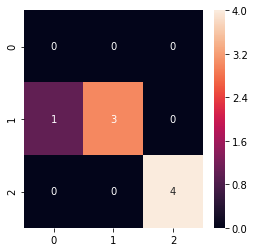

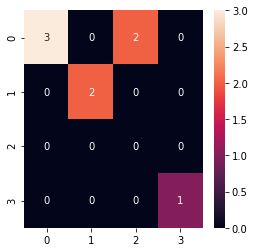

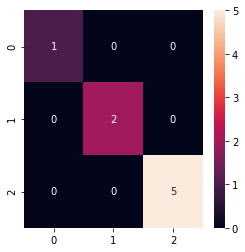

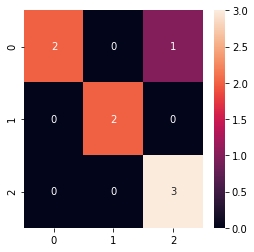

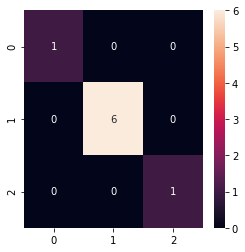

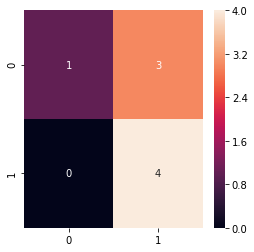

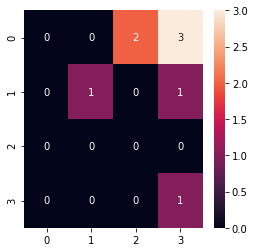

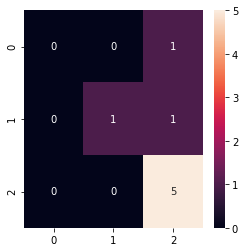

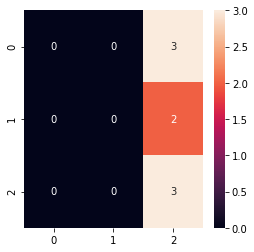

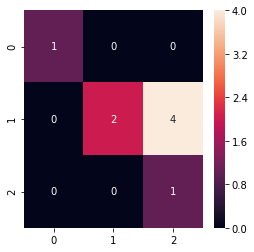

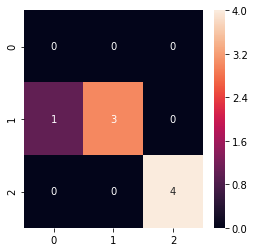

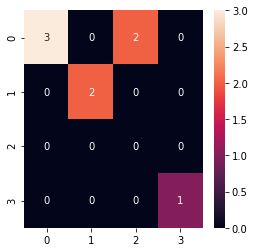

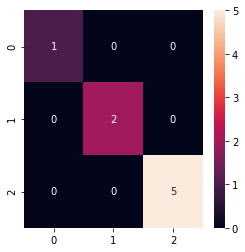

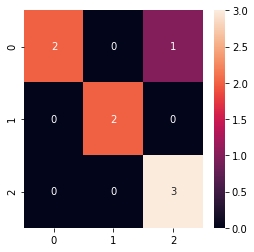

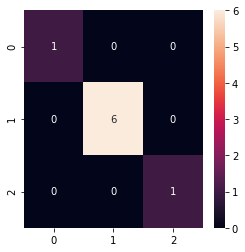

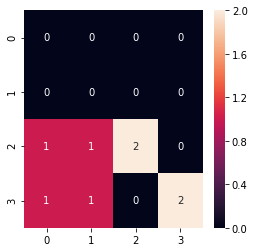

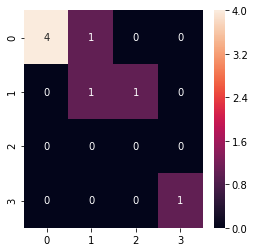

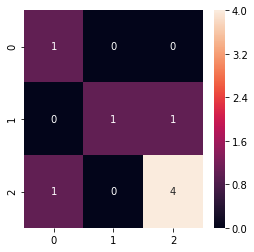

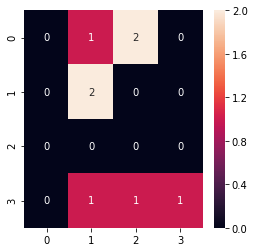

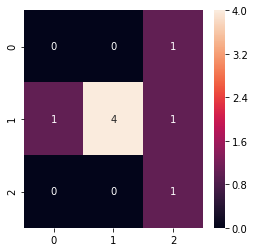

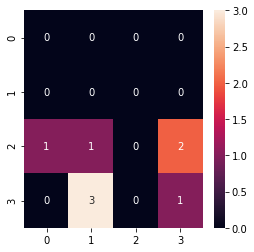

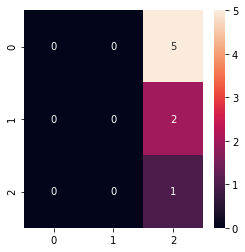

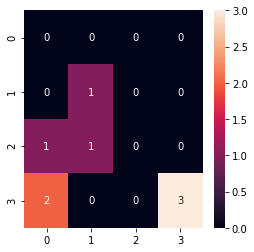

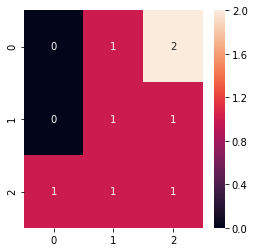

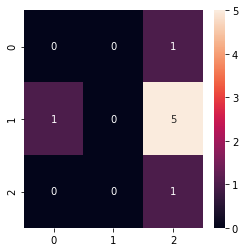

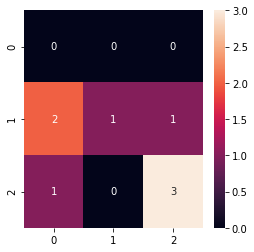

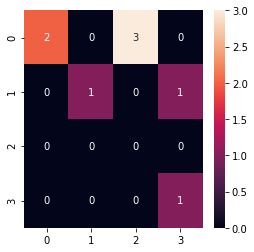

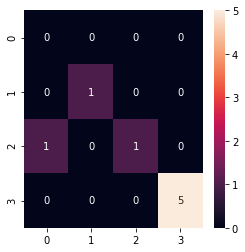

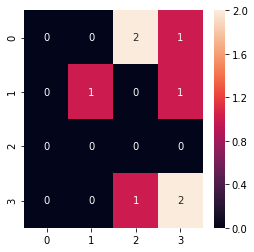

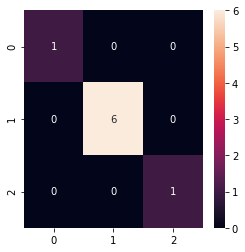

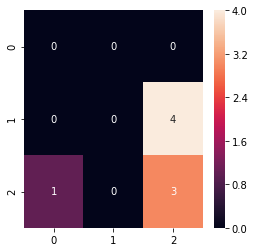

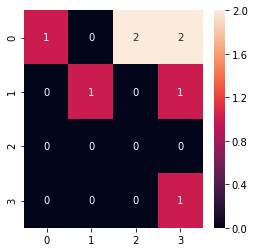

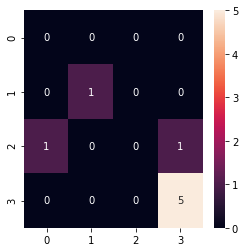

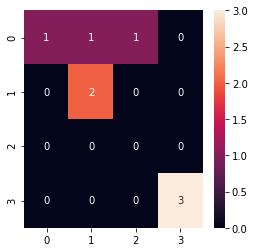

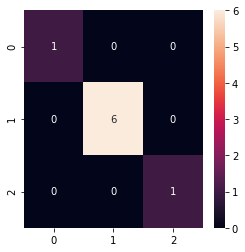

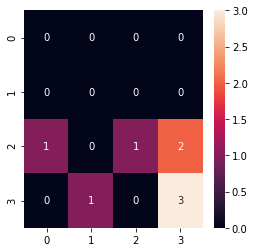

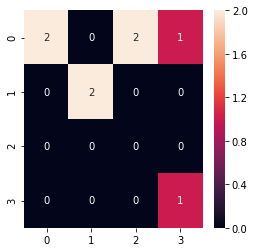

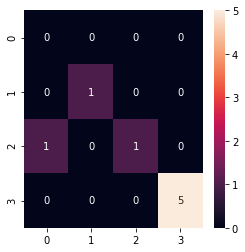

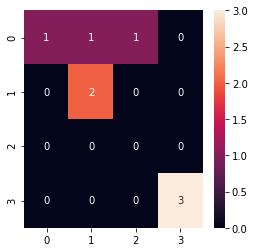

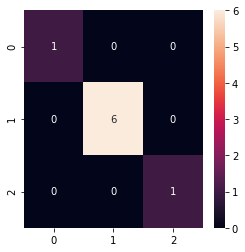

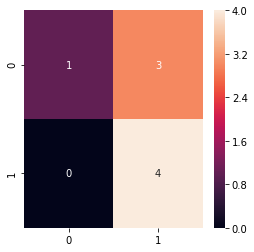

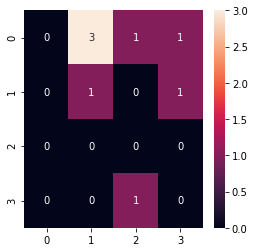

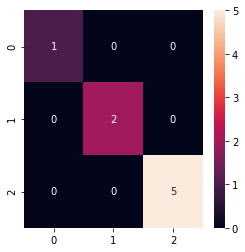

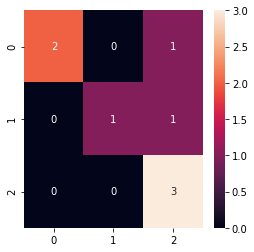

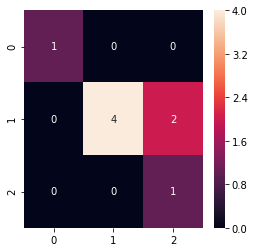

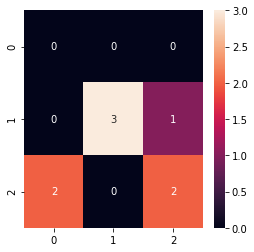

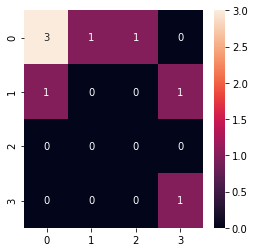

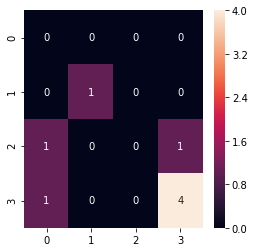

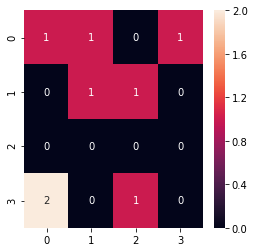

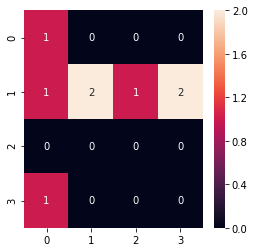

In [0]:
i=1
# if i==1:
    # rbf kernel
clf = SVM('rbf')
acc_svm = cross_validation(kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM(rbf) is = %f' % acc_svm)
print('Best hyper-params for SVM(rbf) due to CV:')
print(clf.best_params_)
# elif i==2:
# poly kernel
clf = SVM('poly')
acc_svm = cross_validation(kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM(poly=3) is = %f' % acc_svm)
print('Best hyper-params for SVM(poly=3) due to CV:')
print(clf.best_params_)
# elif i==3:
# poly kernel
clf = SVM('linear')
acc_svm = cross_validation(kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM(linear) is = %f' % acc_svm)
print('Best hyper-params for SVM(linear) due to CV:')
print(clf.best_params_)
# elif i==4:
# Adaboost  
clf = AdaBoost()
acc_adaboost = cross_validation(kb_normal_X1,Y1,clf)
print('\nAccuracy of AdaBoost is = %f' % acc_adaboost)
print('Best hyper-params for AdaBoost due to CV:')
print(clf.best_params_)
# elif i==5:
# Random forest 
clf = random_forest()
acc_forest = cross_validation(X1,Y1,clf)
print('\nAccuracy of RandomForest is = %f' % acc_forest)
print('Best hyper-params for RandomForest due to CV:')
print(clf.best_params_)
# elif i==6:
# KNN 
clf = KNN_clf()
acc_knn = cross_validation(kb_normal_X1,Y1,clf)
print('\nAccuracy of KNN is = %f' % acc_knn)
print('Best hyper-params for KNN due to CV:')
print(clf.best_params_)
# elif i==7:
####################### multi layer perceptron #################
clf = nn_clf()
acc_mlp = cross_validation(kb_normal_X1,Y1,clf)
print('\nAccuracy of MLP is = %f' % acc_mlp)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
# elif i==8:
clf=logisticregression()
acc_log = cross_validation(kb_normal_X1,Y1,clf)
print('\nAccuracy of logistic regression is = %f' % acc_log)
print('Best hyper-params for logistic regression due to CV:')
print(clf.best_params_)
# elif i==9:
clf=LDA()
acc_log = cross_validation(kb_normal_X1,Y1,clf)
print('\nAccuracy of linear discriminant analysis is = %f' % acc_log)
print('Best hyper-params for linear discriminant analysis due to CV:')
print(clf.best_params_)
# elif i==10:
clf=QDA()
acc_log = cross_validation(kb_normal_X1,Y1,clf)
print('\nAccuracy of quaadratic discriminant analysis is = %f' % acc_log)

<font font size=5, color='red'>Training data 2:<br>

In [0]:
i=1
if i==1:
    # rbf kernel
    clf = SVM('rbf')
    acc_svm = cross_validation(kb_normal_X2,Y2,clf)
    print('\nAccuracy of SVM is = %f' % acc_svm)
    print('Best hyper-params for SVM due to CV:')
    print(clf.best_params_)
elif i==2:
    # poly kernel
    clf = SVM('poly')
    acc_svm = cross_validation(kb_normal_X2,Y2,clf)
    print('\nAccuracy of SVM is = %f' % acc_svm)
    print('Best hyper-params for SVM due to CV:')
    print(clf.best_params_)
elif i==3:
    # poly kernel
    clf = SVM('linear')
    acc_svm = cross_validation(kb_normal_X2,Y2,clf)
    print('\nAccuracy of SVM is = %f' % acc_svm)
    print('Best hyper-params for SVM due to CV:')
    print(clf.best_params_)
elif i==4:
    # Adaboost  
    clf = AdaBoost()
    acc_adaboost = cross_validation(kb_normal_X2,Y2,clf)
    print('\nAccuracy of AdaBoost is = %f' % acc_adaboost)
    print('Best hyper-params for AdaBoost due to CV:')
    print(clf.best_params_)
elif i==5:
    # Random forest 
    clf = random_forest()
    acc_forest = cross_validation(kb_normal_X2,Y2,clf)
    print('\nAccuracy of RandomForest is = %f' % acc_forest)
    print('Best hyper-params for RandomForest due to CV:')
    print(clf.best_params_)
elif i==6:
    # KNN 
    clf = KNN_clf()
    acc_knn = cross_validation(kb_normal_X2,Y2,clf)
    print('\nAccuracy of KNN is = %f' % acc_knn)
    print('Best hyper-params for KNN due to CV:')
    print(clf.best_params_)
elif i==7:
    # mlp 
    clf = nn_clf()
    acc_mlp = cross_validation(kb_normal_X2,Y2,clf)
    print('\nAccuracy of MLP is = %f' % acc_mlp)
    print('Best hyper-params for MLP due to CV:')
    print(clf.best_params_)
elif i==8:
  # sigmoid kernel
  clf = SVM('sigmoid')
  acc_svm = cross_validation(kb_normal_X2,Y2,clf)
  print('\nAccuracy of SVM is = %f' % acc_svm)
  print('Best hyper-params for SVM due to CV:')
  print(clf.best_params_)
elif i==9:
  clf=logisticregression()
  acc_log = cross_validation(kb_normal_X2,Y2,clf)
  print('\nAccuracy of logistic regression is = %f' % acc_log)
  print('Best hyper-params for MLP due to CV:')
  print(clf.best_params_)
elif i==10:
  clf=LDA()
  acc_log = cross_validation(kb_normal_X2,Y2,clf)
  print('\nAccuracy of linear discriminant analysis is = %f' % acc_log)
  print('Best hyper-params for MLP due to CV:')
  print(clf.best_params_)
elif i==11:
  clf=QDA()
  acc_log = cross_validation(kb_normal_X2,Y2,clf)
  print('\nAccuracy of quaadratic discriminant analysis is = %f' % acc_log)

<font font size=5, color='red'>Training data 3:<br>

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed


Accuracy of logistic regression is = 0.150000
Best hyper-params for MLP due to CV:
{'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn


Accuracy of linear discriminant analysis is = 0.395000
Best hyper-params for MLP due to CV:
{'solver': 'lsqr'}


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Accuracy of quaadratic discriminant analysis is = 0.191667


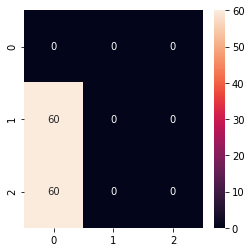

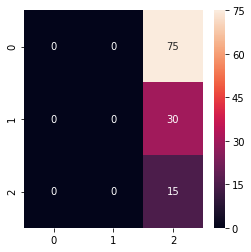

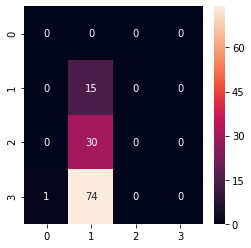

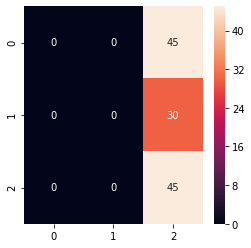

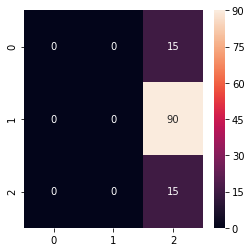

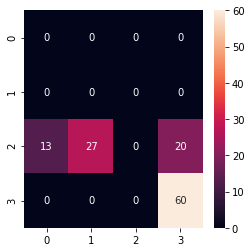

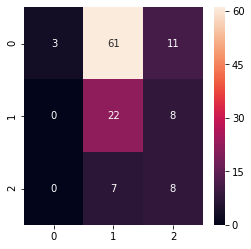

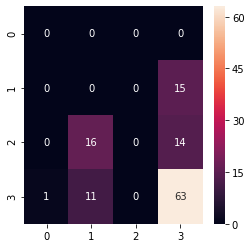

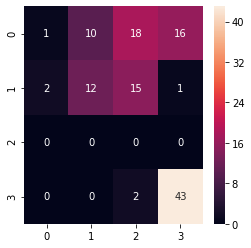

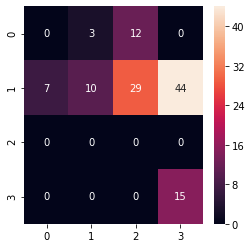

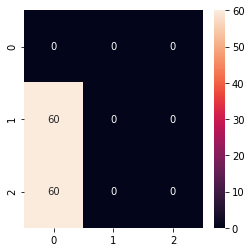

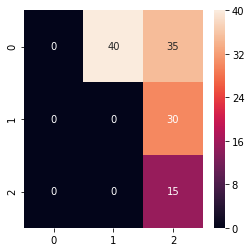

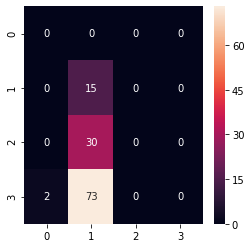

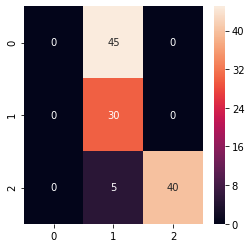

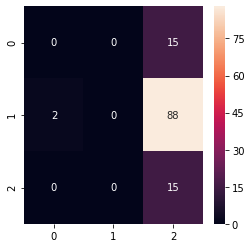

In [75]:
i=1
# if i==1:
# rbf kernel
clf = SVM('rbf')
acc_svm = cross_validation(kb_normal_X3,Y3,clf)
print('\nAccuracy of SVM(rbf) is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==2:
# poly kernel
clf = SVM('poly')
acc_svm = cross_validation(kb_normal_X3,Y3,clf)
print('\nAccuracy of SVM(poly) is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==3:
# poly kernel
clf = SVM('linear')
acc_svm = cross_validation(kb_normal_X3,Y3,clf)
print('\nAccuracy of SVM(linear) is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==4:
# Adaboost  
clf = AdaBoost()
acc_adaboost = cross_validation(kb_normal_X3,Y3,clf)
print('\nAccuracy of AdaBoost is = %f' % acc_adaboost)
print('Best hyper-params for AdaBoost due to CV:')
print(clf.best_params_)
# elif i==5:
# Random forest 
clf = random_forest()
acc_forest = cross_validation(kb_normal_X3,Y3,clf)
print('\nAccuracy of RandomForest is = %f' % acc_forest)
print('Best hyper-params for RandomForest due to CV:')
print(clf.best_params_)
# elif i==6:
# KNN 
clf = KNN_clf()
acc_knn = cross_validation(kb_normal_X3,Y3,clf)
print('\nAccuracy of KNN is = %f' % acc_knn)
print('Best hyper-params for KNN due to CV:')
print(clf.best_params_)
# elif i==7:
# mlp 
clf = nn_clf()
acc_mlp = cross_validation(kb_normal_X3,Y3,clf)
print('\nAccuracy of MLP is = %f' % acc_mlp)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
# elif i==8:
# sigmoid kernel
clf = SVM('sigmoid')
acc_svm = cross_validation(kb_normal_X3,Y3,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
elif i==9:
clf=logisticregression()
acc_log = cross_validation(kb_normal_X3,Y3,clf)
print('\nAccuracy of logistic regression is = %f' % acc_log)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
# elif i==10:
clf=LDA()
acc_log = cross_validation(kb_normal_X3,Y3,clf)
print('\nAccuracy of linear discriminant analysis is = %f' % acc_log)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
# elif i==11:
clf=QDA()
acc_log = cross_validation(kb_normal_X3,Y3,clf)
print('\nAccuracy of quaadratic discriminant analysis is = %f' % acc_log)

<font font size=5, color='red'>Here channels that are more relevant to emotion, or in other words occipital lobe that is more likely to have information related to emotion, so for instance O1,O2,Oz,Fz,Cz are related to mentioned lobe and here we choose O1,O2,Oz:<br>

In [47]:
channels = [13,14,31]
channel_select = data[:,channels,:]
print('shape data',channel_select.shape)

shape data (40, 3, 315)


<font font size=5, color='red'>Data 1 with selected eeg channels:<br>

In [48]:
v=channel_select[0,:,:].reshape(-1)
for i in range(1,40):
    v=np.vstack((v,channel_select[i,:,:].reshape(-1)))
channel_select_X1 = np.copy(v)
channel_select_Y1 = y
print('target 1:', channel_select_X1.shape)
print('label 1:', channel_select_Y1.shape)

target 1: (40, 945)
label 1: (40,)


<font font size=5, color='red'>Data 2 with selected eeg channels:<br>

In [49]:
arr3=np.empty([0,21])
for i in range(0,channel_select.shape[0]):
    for j in range(0,channel_select.shape[1]):
        for k in range(0,15):
            X3=channel_select[i,j,21*k:21*(k+1)]
            arr3=np.vstack((arr3,X3))
channel_select_X2 = arr3
channel_select_Y2 = np.repeat(y,len(channels)*15)
print('target 2:', channel_select_X2.shape)
print('label 2:', channel_select_Y2.shape)

target 2: (1800, 21)
label 2: (1800,)


<font font size=5, color='red'>Data 3 with selected eeg channels:<br>

In [50]:
d=[]
# print(channel_select[:,:,0:21])
c=channel_select[:,:,0:21]
c = np.transpose(c,axes=[0,2,1])
c = c.reshape(40,-1)
# print(c)
for i in range(1,15):
    a=channel_select[:,:,21*i:21*i+21]
    a = np.transpose(a,axes=[0,2,1])
    a = a.reshape(40,-1)
    c=np.vstack((c,a))
channel_select_X3 = c
channel_select_Y3 = np.repeat(y,15)
print('target 3:', channel_select_X3.shape)
print('label 3:', channel_select_Y3.shape)

target 3: (600, 63)
label 3: (600,)


<font font size=5, color='red'> Feature selection 

In [71]:
channel_select_kb_X1 = kbest(20, channel_select_X1, channel_select_Y1)
channel_select_kb_X2 = kbest(3, channel_select_X2, channel_select_Y2)
channel_select_kb_X3 = kbest(50, channel_select_X3, channel_select_Y3)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [301 302 303 304 305 306 307 308 309 310 311 312 313 314 616 617 618 619
 620 621 622 623 624 625 626 627 628 629 931 932 933 934 935 936 937 938
 939 940 941 942 943 944] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


<font font size=5, color='red'> Normalizing selected channels:<br>

In [0]:
channel_select_kb_normal_X1 = data_cleaning(channel_select_kb_X1)
channel_select_kb_normal_X2 = data_cleaning(channel_select_kb_X2)
channel_select_kb_normal_X3 = data_cleaning(channel_select_kb_X3)

<font font size=5, color='red'>data 1 selected channels:<br>


Accuracy of SVM is = 0.600000
Best hyper-params for SVM due to CV:
{'C': 100, 'gamma': 0.1}

Accuracy of SVM is = 0.400000
Best hyper-params for SVM due to CV:
{'C': 0.0001, 'gamma': 101}

Accuracy of SVM is = 0.600000
Best hyper-params for SVM due to CV:
{'C': 10, 'gamma': 0}

Accuracy of AdaBoost is = 0.275000
Best hyper-params for AdaBoost due to CV:
{'n_estimators': 100}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of RandomForest is = 0.450000
Best hyper-params for RandomForest due to CV:
{'max_depth': 6, 'n_estimators': 40}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of KNN is = 0.425000
Best hyper-params for KNN due to CV:
{'n_neighbors': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr


Accuracy of MLP is = 0.450000
Best hyper-params for MLP due to CV:
{'hidden_layer_sizes': 15}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/


Accuracy of logistic regression is = 0.325000
Best hyper-params for logistic regression due to CV:
{'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/sklearn/covariance/empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened.


Accuracy of linear discriminant analysis is = 0.425000
Best hyper-params for linear discriminant analysis due to CV:
{'solver': 'svd'}


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/pyt


Accuracy of quaadratic discriminant analysis is = 0.450000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


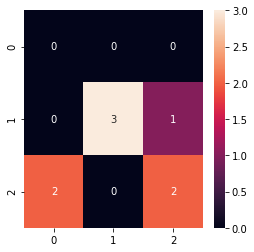

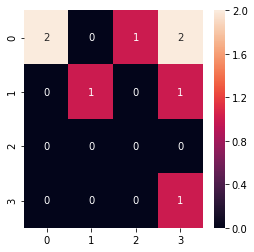

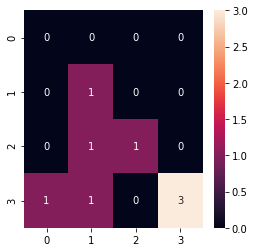

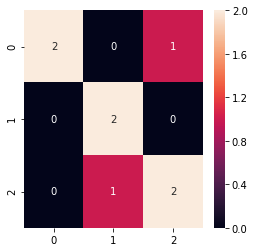

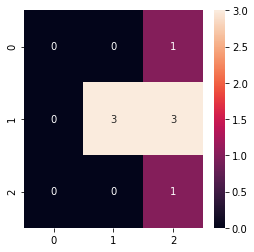

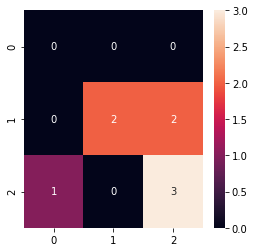

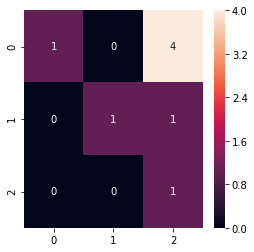

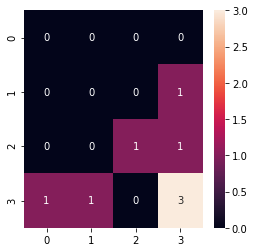

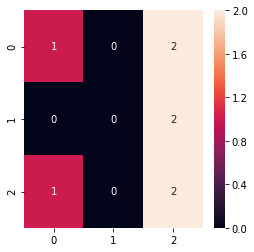

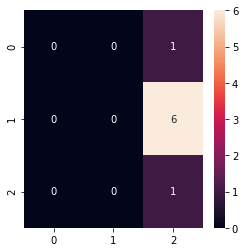

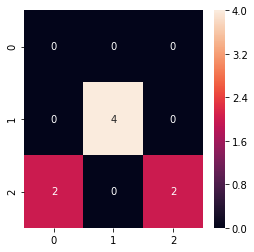

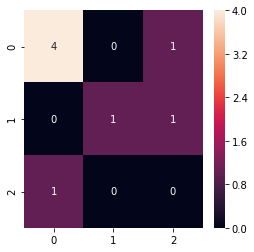

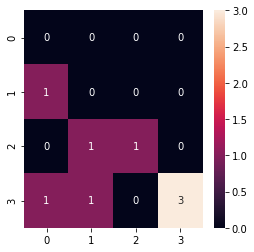

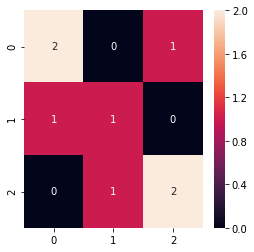

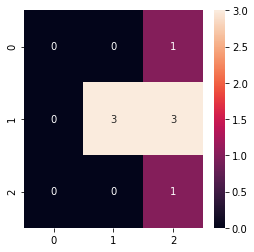

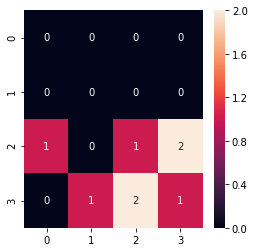

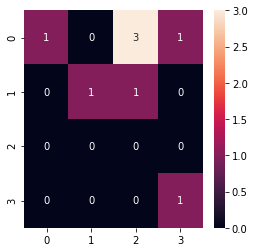

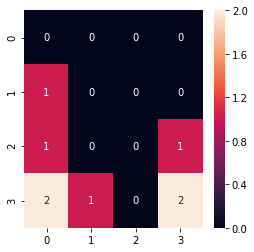

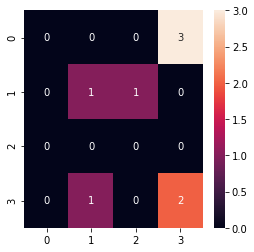

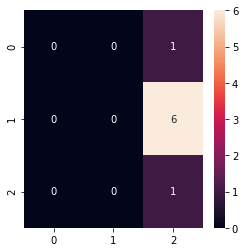

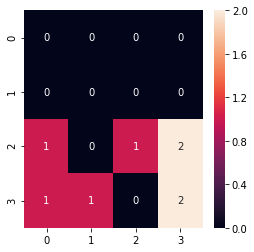

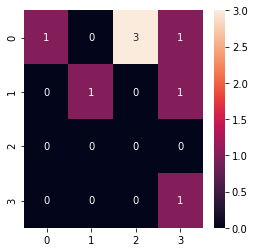

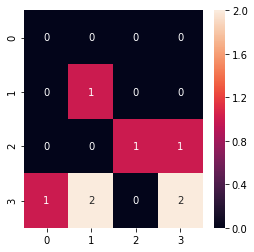

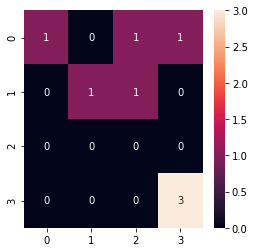

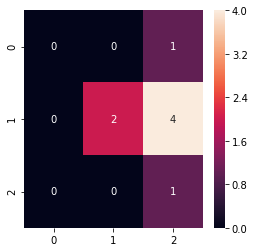

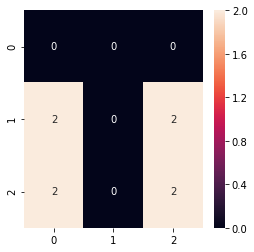

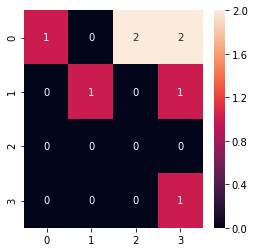

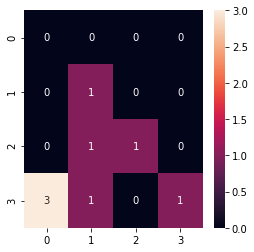

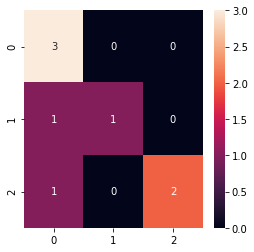

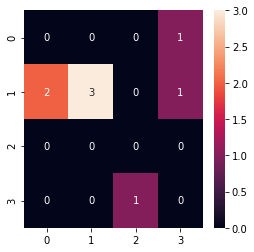

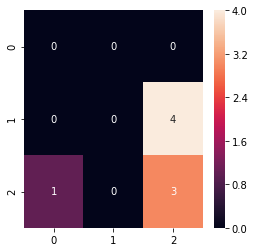

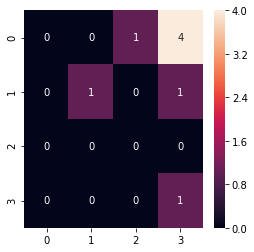

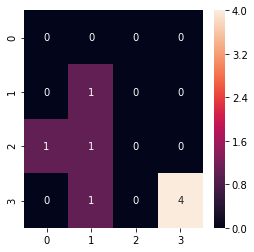

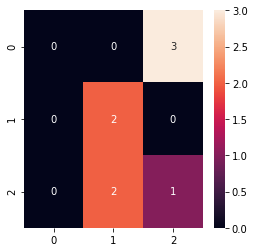

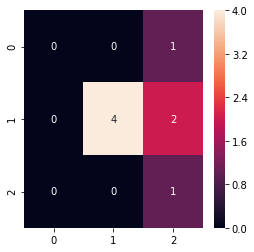

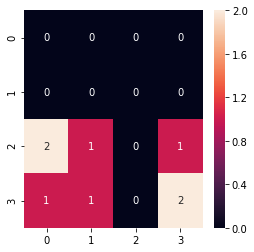

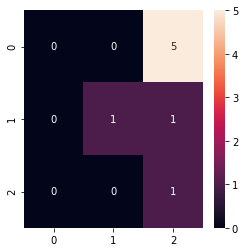

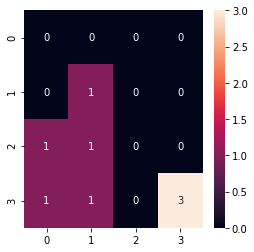

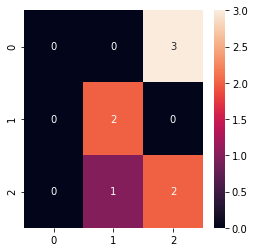

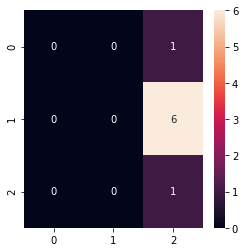

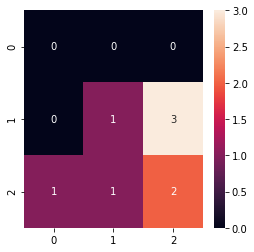

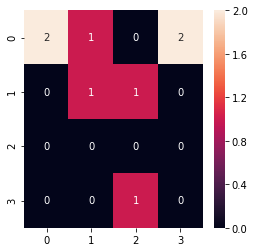

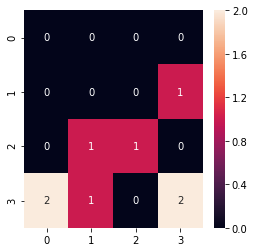

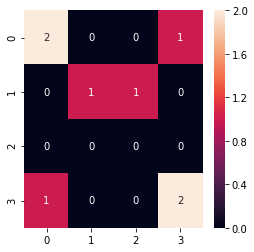

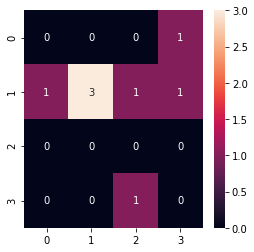

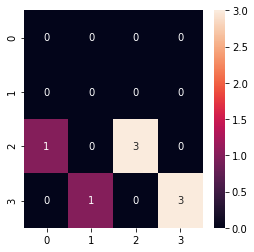

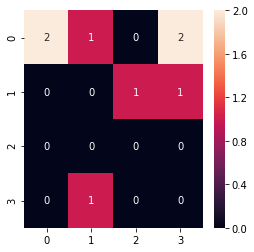

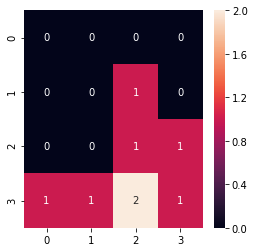

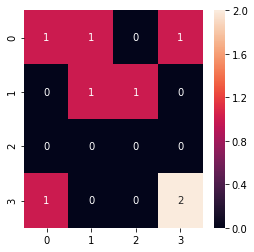

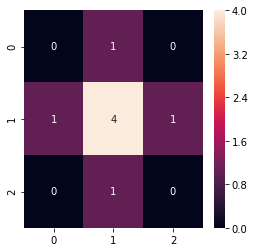

In [59]:
i=3
# if i==1:
# rbf kernel
clf = SVM('rbf')
acc_svm = cross_validation(channel_select_kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==2:
# poly kernel
clf = SVM('poly')
acc_svm = cross_validation(channel_select_kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==3:
# poly kernel
clf = SVM('linear')
acc_svm = cross_validation(channel_select_kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==4:
# Adaboost  
clf = AdaBoost()
acc_adaboost = cross_validation(channel_select_kb_normal_X1,Y1,clf)
print('\nAccuracy of AdaBoost is = %f' % acc_adaboost)
print('Best hyper-params for AdaBoost due to CV:')
print(clf.best_params_)
# elif i==5:
# Random forest 
clf = random_forest()
acc_forest = cross_validation(channel_select_kb_normal_X1,Y1,clf)
print('\nAccuracy of RandomForest is = %f' % acc_forest)
print('Best hyper-params for RandomForest due to CV:')
print(clf.best_params_)
# elif i==6:
# KNN 
clf = KNN_clf()
acc_knn = cross_validation(channel_select_kb_normal_X1,Y1,clf)
print('\nAccuracy of KNN is = %f' % acc_knn)
print('Best hyper-params for KNN due to CV:')
print(clf.best_params_)
# elif i==7:
# mlp 
clf = nn_clf()
acc_mlp = cross_validation(channel_select_kb_normal_X1,Y1,clf)
print('\nAccuracy of MLP is = %f' % acc_mlp)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
clf=logisticregression()
acc_log = cross_validation(channel_select_kb_normal_X1,Y1,clf)
print('\nAccuracy of logistic regression is = %f' % acc_log)
print('Best hyper-params for logistic regression due to CV:')
print(clf.best_params_)
# elif i==9:
clf=LDA()
acc_log = cross_validation(channel_select_kb_normal_X1,Y1,clf)
print('\nAccuracy of linear discriminant analysis is = %f' % acc_log)
print('Best hyper-params for linear discriminant analysis due to CV:')
print(clf.best_params_)
# elif i==10:
clf=QDA()
acc_log = cross_validation(channel_select_kb_normal_X1,Y1,clf)
print('\nAccuracy of quaadratic discriminant analysis is = %f' % acc_log)

<font font size=5, color='red'>Data2 selected channels:<br>


Accuracy of SVM is = 0.144444
Best hyper-params for SVM due to CV:
{'C': 0.001, 'gamma': 0}

Accuracy of SVM is = 0.149444
Best hyper-params for SVM due to CV:
{'C': 0.0001, 'gamma': 0}

Accuracy of SVM is = 0.150000
Best hyper-params for SVM due to CV:
{'C': 0.0001, 'gamma': 0}

Accuracy of AdaBoost is = 0.179444
Best hyper-params for AdaBoost due to CV:
{'n_estimators': 150}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of RandomForest is = 0.160556
Best hyper-params for RandomForest due to CV:
{'max_depth': 2, 'n_estimators': 20}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of KNN is = 0.175000
Best hyper-params for KNN due to CV:
{'n_neighbors': 20}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of MLP is = 0.150000
Best hyper-params for MLP due to CV:
{'hidden_layer_sizes': 5}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of SVM is = 0.156667
Best hyper-params for SVM due to CV:
{'C': 0.0001, 'gamma': 0}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed


Accuracy of logistic regression is = 0.150000
Best hyper-params for MLP due to CV:
{'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of linear discriminant analysis is = 0.158333
Best hyper-params for MLP due to CV:
{'solver': 'svd'}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of quaadratic discriminant analysis is = 0.186667


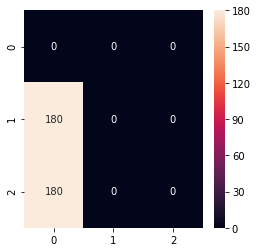

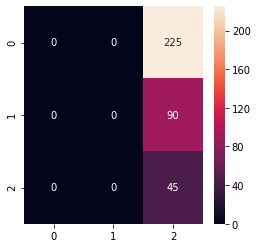

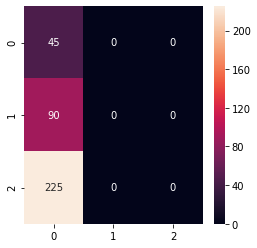

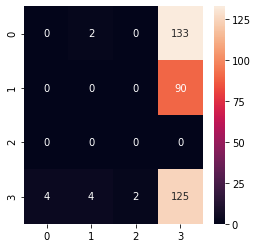

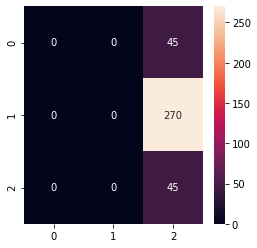

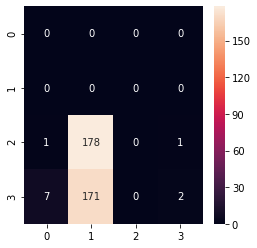

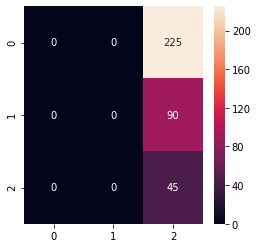

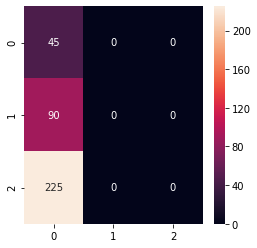

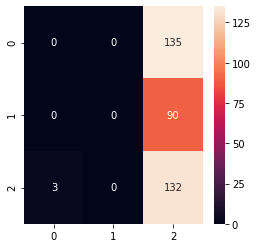

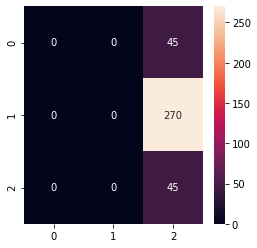

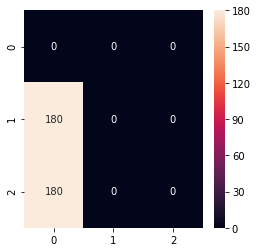

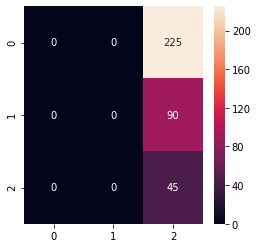

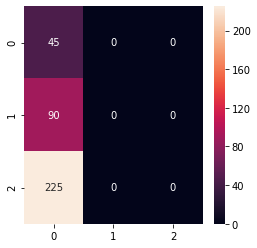

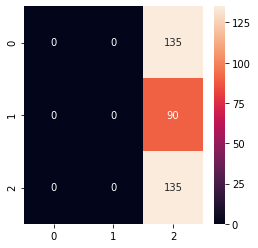

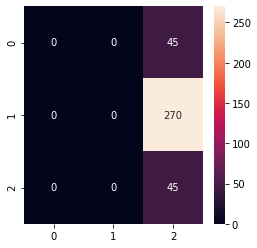

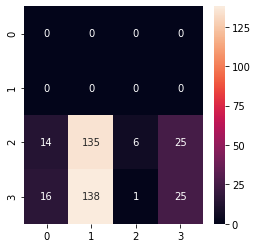

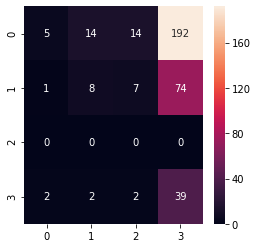

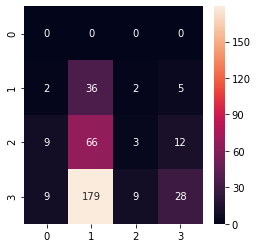

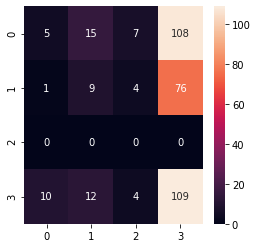

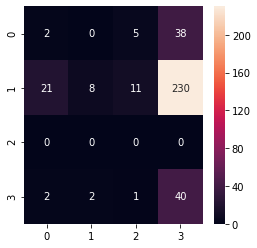

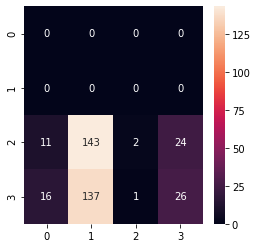

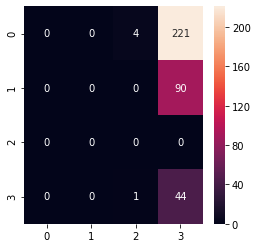

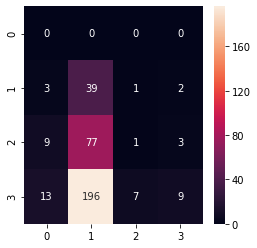

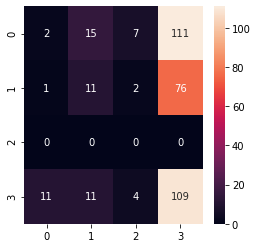

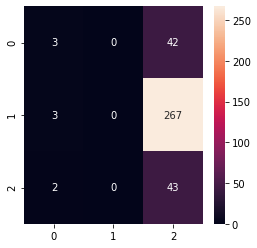

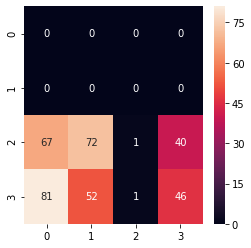

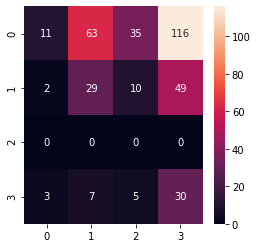

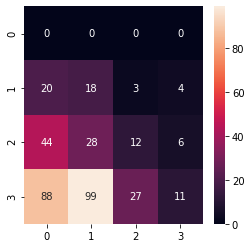

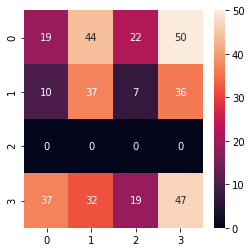

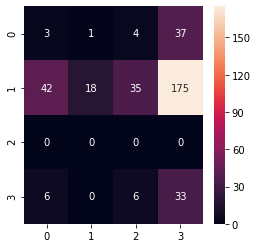

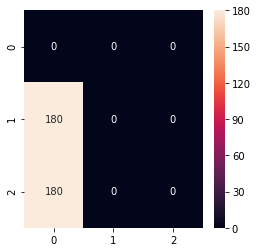

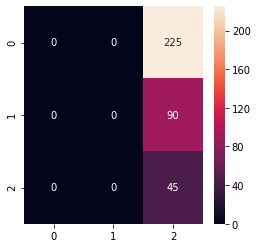

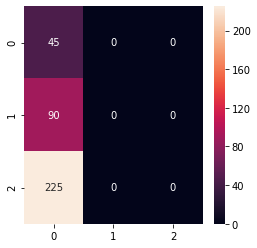

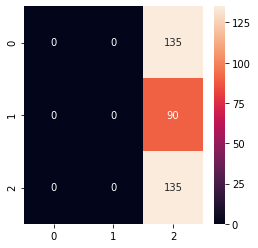

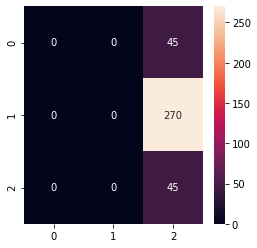

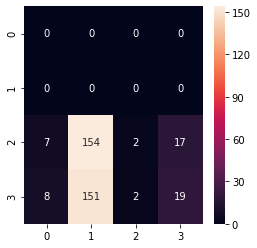

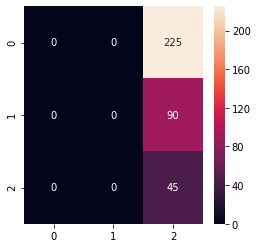

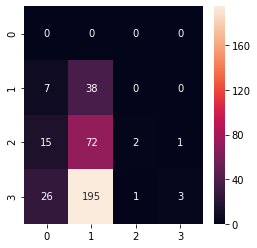

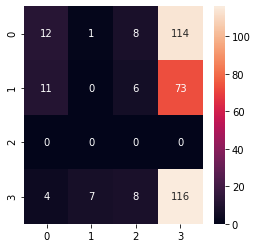

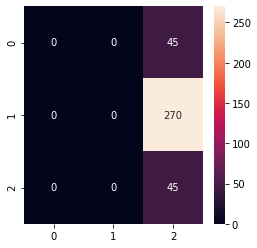

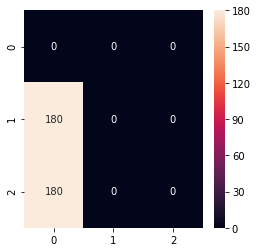

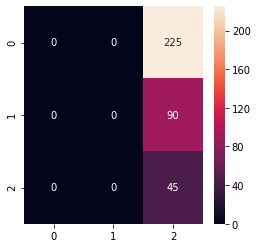

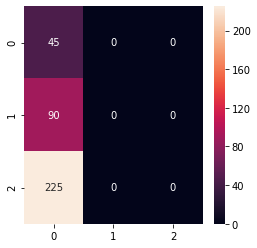

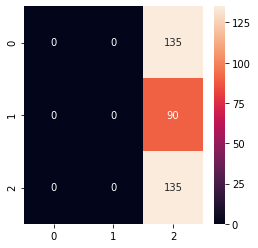

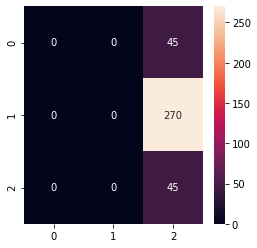

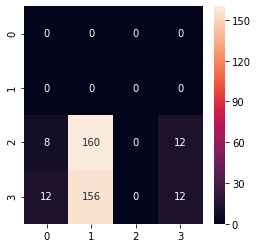

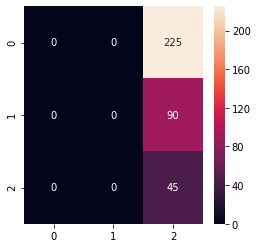

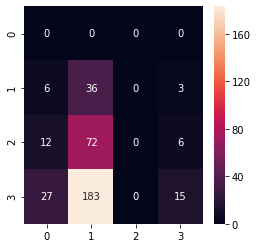

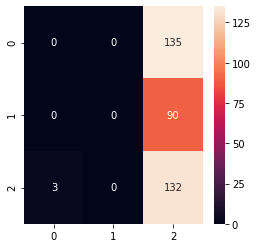

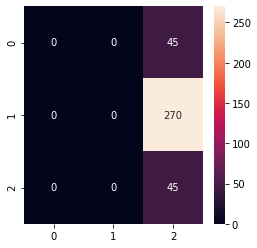

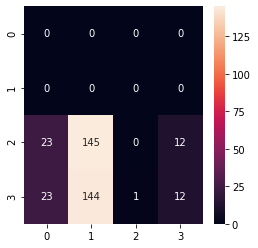

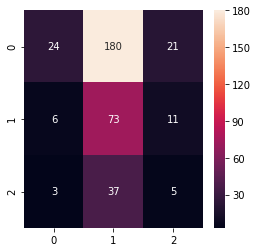

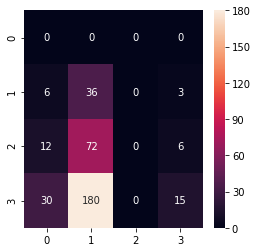

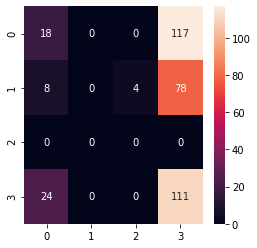

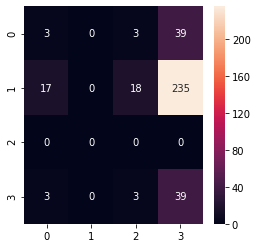

In [74]:
i=1
# if i==1:
# rbf kernel
clf = SVM('rbf')
acc_svm = cross_validation(channel_select_kb_normal_X2,channel_select_Y2,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==2:
# poly kernel
clf = SVM('poly')
acc_svm = cross_validation(channel_select_kb_normal_X2,channel_select_Y2,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==3:
# poly kernel
clf = SVM('linear')
acc_svm = cross_validation(channel_select_kb_normal_X2,channel_select_Y2,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==4:
# Adaboost  
clf = AdaBoost()
acc_adaboost = cross_validation(channel_select_kb_normal_X2,channel_select_Y2,clf)
print('\nAccuracy of AdaBoost is = %f' % acc_adaboost)
print('Best hyper-params for AdaBoost due to CV:')
print(clf.best_params_)
# elif i==5:
# Random forest 
clf = random_forest()
acc_forest = cross_validation(channel_select_kb_normal_X2,channel_select_Y2,clf)
print('\nAccuracy of RandomForest is = %f' % acc_forest)
print('Best hyper-params for RandomForest due to CV:')
print(clf.best_params_)
# elif i==6:
# KNN 
clf = KNN_clf()
acc_knn = cross_validation(channel_select_kb_normal_X2,channel_select_Y2,clf)
print('\nAccuracy of KNN is = %f' % acc_knn)
print('Best hyper-params for KNN due to CV:')
print(clf.best_params_)
# elif i==7:
# mlp 
clf = nn_clf()
acc_mlp = cross_validation(channel_select_kb_normal_X2,channel_select_Y2,clf)
print('\nAccuracy of MLP is = %f' % acc_mlp)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
# elif i==8:
# sigmoid kernel
clf = SVM('sigmoid')
acc_svm = cross_validation(channel_select_kb_normal_X2,channel_select_Y2,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==9:
clf=logisticregression()
acc_log = cross_validation(channel_select_kb_normal_X2,channel_select_Y2,clf)
print('\nAccuracy of logistic regression is = %f' % acc_log)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
# elif i==10:
clf=LDA()
acc_log = cross_validation(channel_select_kb_normal_X2,channel_select_Y2,clf)
print('\nAccuracy of linear discriminant analysis is = %f' % acc_log)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
# elif i==11:
clf=QDA()
acc_log = cross_validation(channel_select_kb_normal_X2,channel_select_Y2,clf)
print('\nAccuracy of quaadratic discriminant analysis is = %f' % acc_log)

<font font size=5, color='red'>Data 3 selected channels:<br>


Accuracy of SVM is = 0.178333
Best hyper-params for SVM due to CV:
{'C': 0.0001, 'gamma': 1e-10}

Accuracy of SVM is = 0.300000
Best hyper-params for SVM due to CV:
{'C': 0.0001, 'gamma': 0}

Accuracy of SVM is = 0.246667
Best hyper-params for SVM due to CV:
{'C': 0.0001, 'gamma': 0}

Accuracy of AdaBoost is = 0.260000
Best hyper-params for AdaBoost due to CV:
{'n_estimators': 10}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of RandomForest is = 0.400000
Best hyper-params for RandomForest due to CV:
{'max_depth': 10, 'n_estimators': 10}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of KNN is = 0.413333
Best hyper-params for KNN due to CV:
{'n_neighbors': 15}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr


Accuracy of MLP is = 0.150000
Best hyper-params for MLP due to CV:
{'hidden_layer_sizes': 5}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of SVM is = 0.241667
Best hyper-params for SVM due to CV:
{'C': 0.0001, 'gamma': 0}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed


Accuracy of logistic regression is = 0.248333
Best hyper-params for MLP due to CV:
{'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of linear discriminant analysis is = 0.426667
Best hyper-params for MLP due to CV:
{'solver': 'svd'}


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/pyt


Accuracy of quaadratic discriminant analysis is = 0.391667


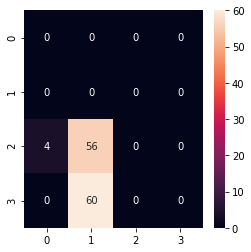

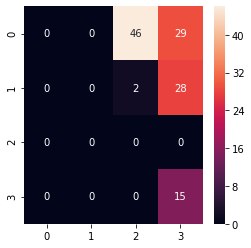

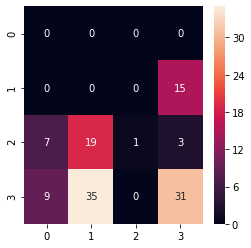

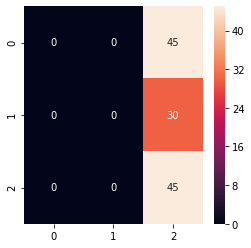

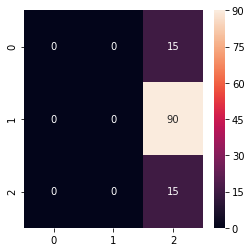

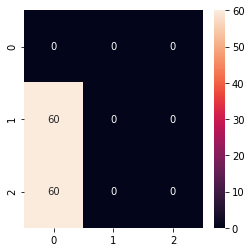

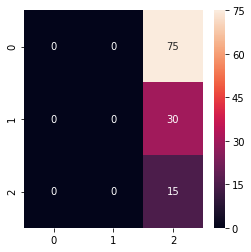

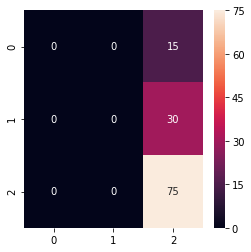

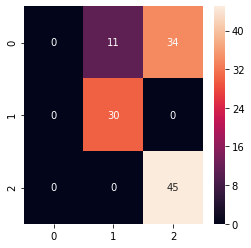

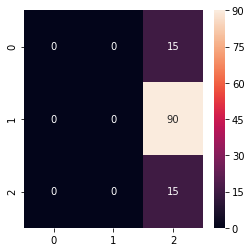

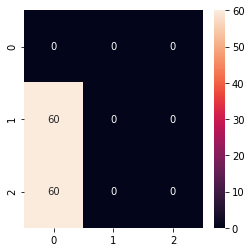

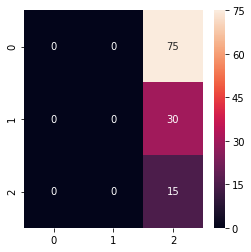

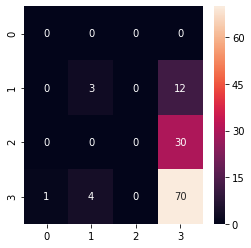

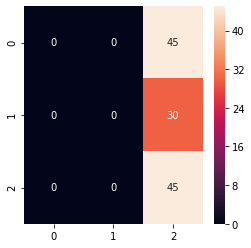

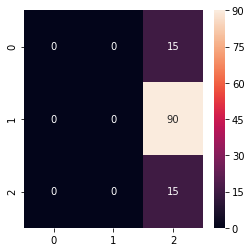

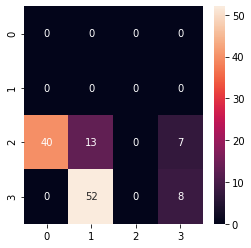

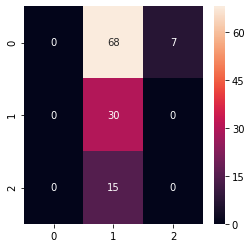

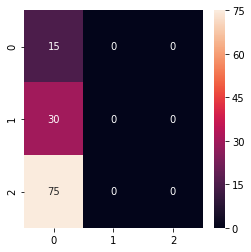

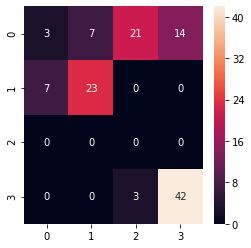

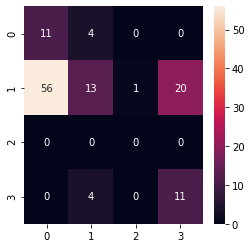

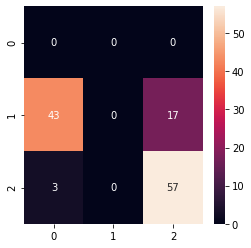

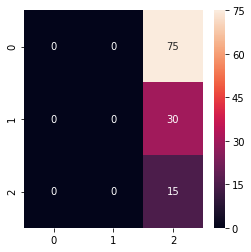

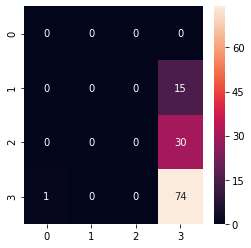

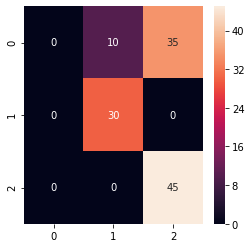

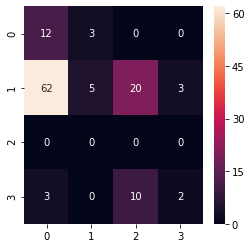

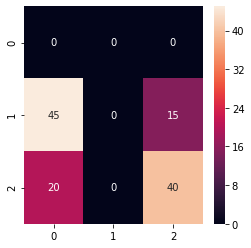

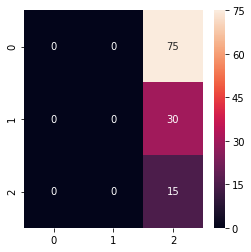

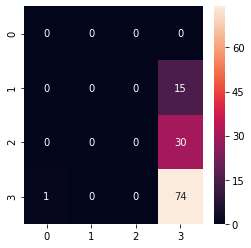

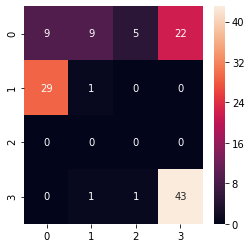

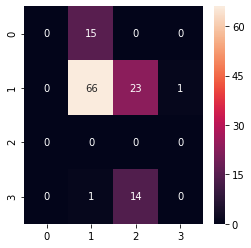

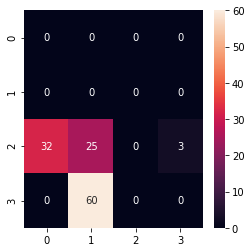

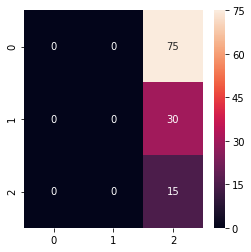

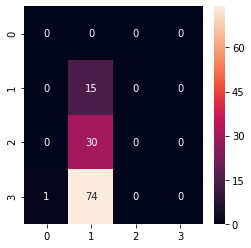

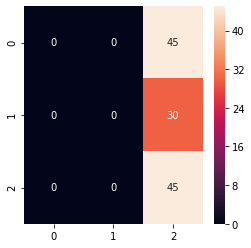

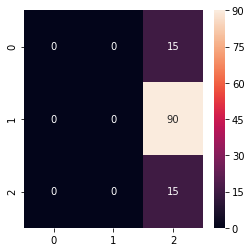

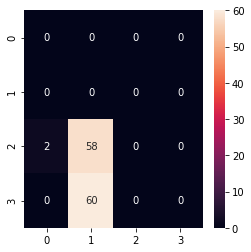

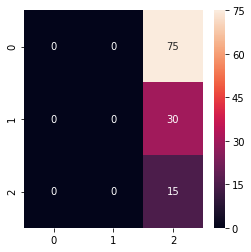

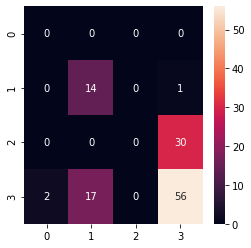

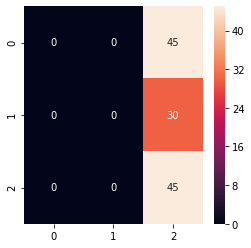

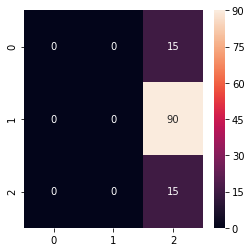

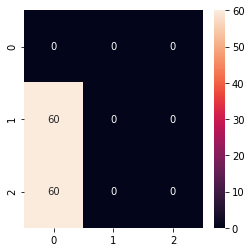

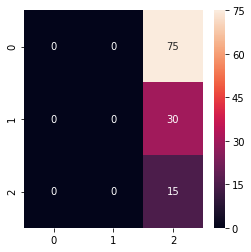

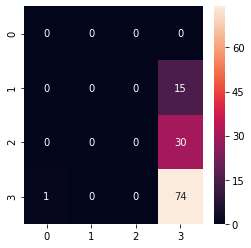

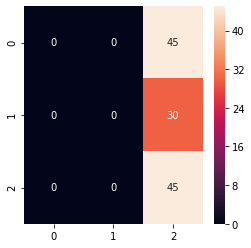

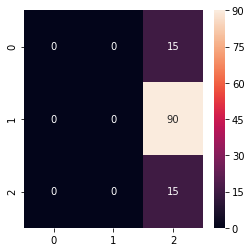

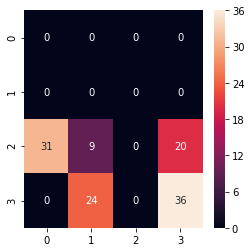

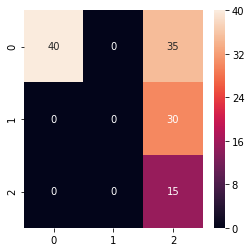

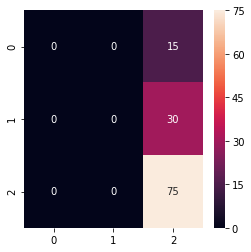

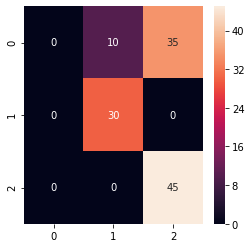

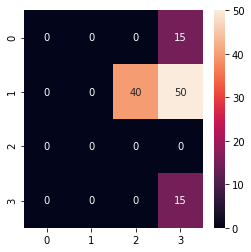

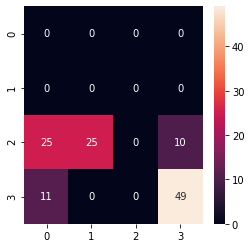

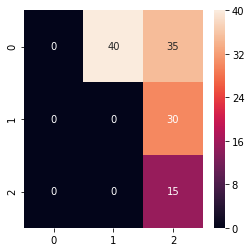

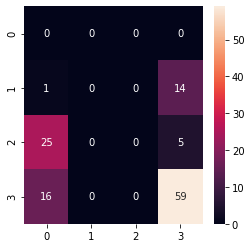

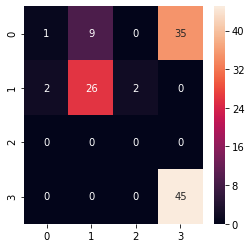

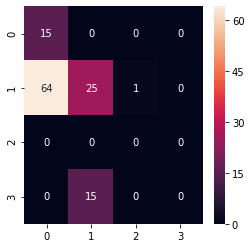

In [67]:
i=1
# if i==1:
# rbf kernel
clf = SVM('rbf')
acc_svm = cross_validation(channel_select_kb_normal_X3,Y3,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==2:
# poly kernel
clf = SVM('poly')
acc_svm = cross_validation(channel_select_kb_normal_X3,Y3,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==3:
# poly kernel
clf = SVM('linear')
acc_svm = cross_validation(channel_select_kb_normal_X3,Y3,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==4:
# Adaboost  
clf = AdaBoost()
acc_adaboost = cross_validation(channel_select_kb_normal_X3,Y3,clf)
print('\nAccuracy of AdaBoost is = %f' % acc_adaboost)
print('Best hyper-params for AdaBoost due to CV:')
print(clf.best_params_)
# elif i==5:
# Random forest 
clf = random_forest()
acc_forest = cross_validation(channel_select_kb_normal_X3,Y3,clf)
print('\nAccuracy of RandomForest is = %f' % acc_forest)
print('Best hyper-params for RandomForest due to CV:')
print(clf.best_params_)
# elif i==6:
# KNN 
clf = KNN_clf()
acc_knn = cross_validation(channel_select_kb_normal_X3,Y3,clf)
print('\nAccuracy of KNN is = %f' % acc_knn)
print('Best hyper-params for KNN due to CV:')
print(clf.best_params_)
# elif i==7:
# mlp 
clf = nn_clf()
acc_mlp = cross_validation(channel_select_kb_normal_X3,Y3,clf)
print('\nAccuracy of MLP is = %f' % acc_mlp)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
clf = SVM('sigmoid')
acc_svm = cross_validation(channel_select_kb_normal_X3,Y3,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==9:
clf=logisticregression()
acc_log = cross_validation(channel_select_kb_normal_X3,Y3,clf)
print('\nAccuracy of logistic regression is = %f' % acc_log)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
# elif i==10:
clf=LDA()
acc_log = cross_validation(channel_select_kb_normal_X3,Y3,clf)
print('\nAccuracy of linear discriminant analysis is = %f' % acc_log)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
# elif i==11:
clf=QDA()
acc_log = cross_validation(channel_select_kb_normal_X3,Y3,clf)
print('\nAccuracy of quaadratic discriminant analysis is = %f' % acc_log)

<font font size=5, color='red'>Different window size = 20s,12s,8s

In [0]:
data_new1 = data[:,:,:21*14]
new_data = data.reshape(40,32,15,21)
new_data1 = data_new1.reshape(40,32,14,21)

data1 = new_data.reshape(40,32,5,3,21)
data2 = new_data.reshape(40,32,3,5,21)
data3 = new_data1.reshape(40,32,7,2,21)

aa = np.mean(data1, axis=4)
bb = np.mean(data2, axis=4)
cc = np.mean(data3, axis=4)

w12_data = aa.reshape(40,32,-1)
w20_data = bb.reshape(40,32,-1)
w8_data = cc.reshape(40,32,-1)

<font font size=5, color='red'>window size = 12s:<br>

In [77]:
v=w12_data[0,:,:].reshape(-1)
for i in range(1,40):
    v=np.vstack((v,w12_data[i,:,:].reshape(-1)))
w12_data_X1 = np.copy(v)
w12_data_Y1 = y
print('target 1:', w12_data_X1.shape)
print('label 1:', w12_data_Y1.shape)

target 1: (40, 480)
label 1: (40,)


In [0]:
w12_data_kb_X1 = kbest(10, w12_data_X1, w12_data_Y1)
w12_data_kb_normal_X1 = data_cleaning(w12_data_kb_X1)


Accuracy of SVM is = 0.575000
Best hyper-params for SVM due to CV:
{'C': 10, 'gamma': 1}

Accuracy of SVM is = 0.525000
Best hyper-params for SVM due to CV:
{'C': 0.001, 'gamma': 101}

Accuracy of SVM is = 0.625000
Best hyper-params for SVM due to CV:
{'C': 100, 'gamma': 0}

Accuracy of AdaBoost is = 0.350000
Best hyper-params for AdaBoost due to CV:
{'n_estimators': 70}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of RandomForest is = 0.525000
Best hyper-params for RandomForest due to CV:
{'max_depth': 4, 'n_estimators': 20}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of KNN is = 0.550000
Best hyper-params for KNN due to CV:
{'n_neighbors': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr


Accuracy of MLP is = 0.425000
Best hyper-params for MLP due to CV:
{'hidden_layer_sizes': 15}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed


Accuracy of logistic regression is = 0.325000
Best hyper-params for logistic regression due to CV:
{'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/sklearn/covariance/empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened.


Accuracy of linear discriminant analysis is = 0.475000
Best hyper-params for linear discriminant analysis due to CV:
{'solver': 'lsqr'}


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/pyt


Accuracy of quaadratic discriminant analysis is = 0.150000


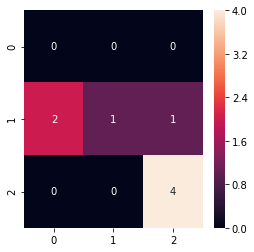

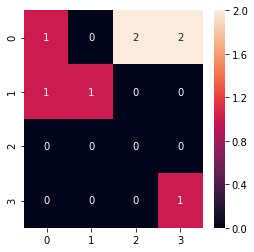

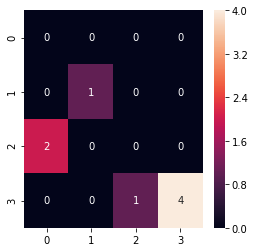

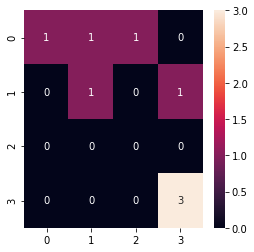

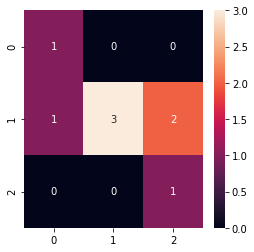

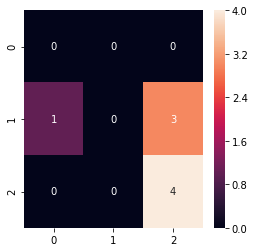

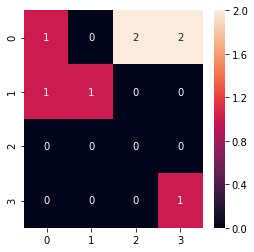

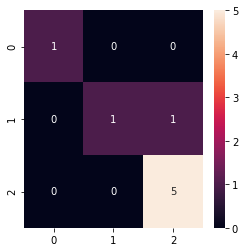

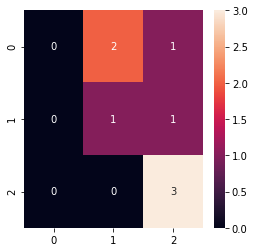

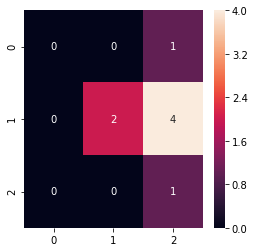

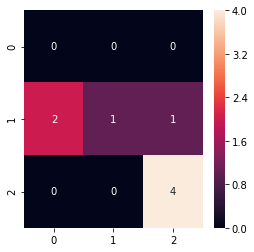

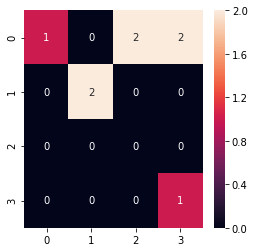

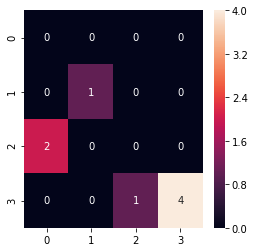

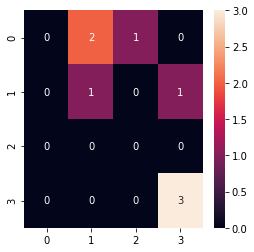

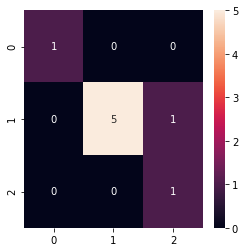

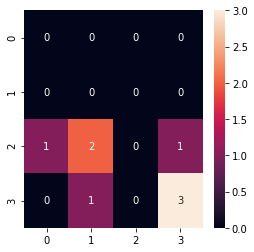

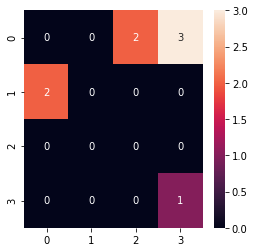

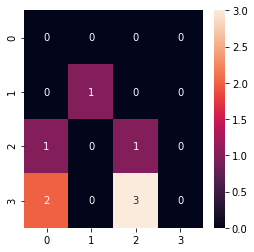

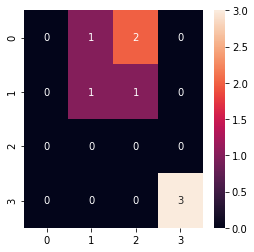

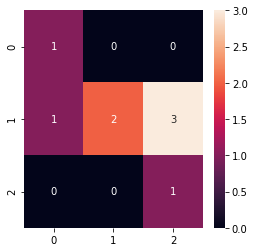

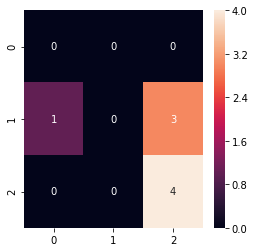

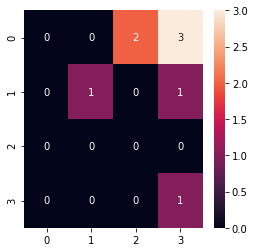

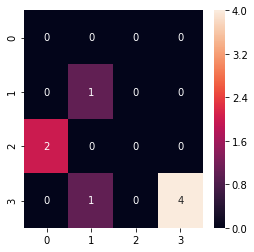

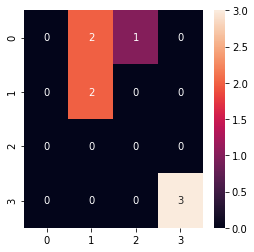

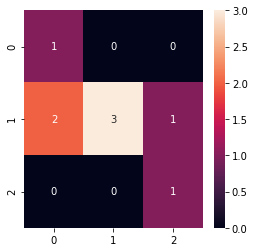

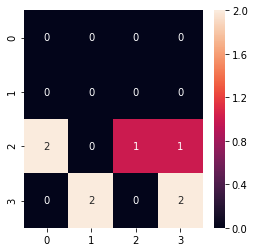

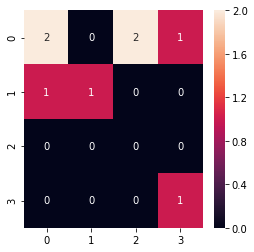

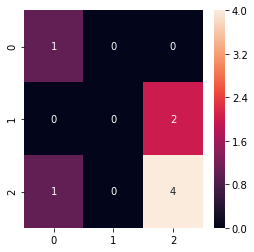

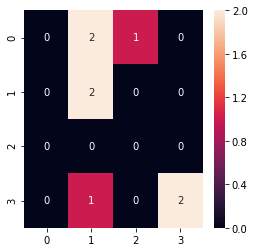

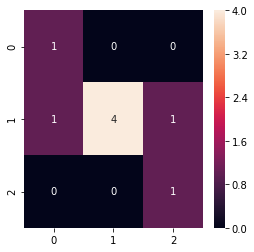

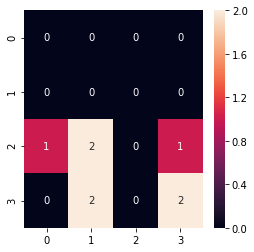

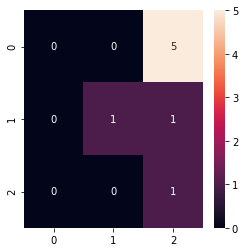

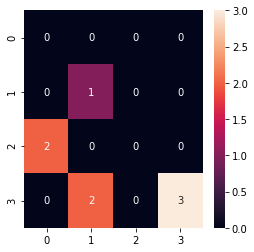

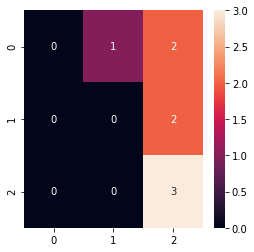

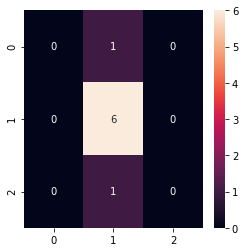

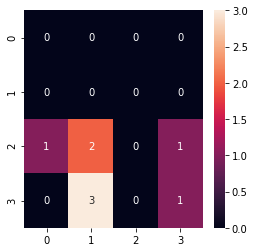

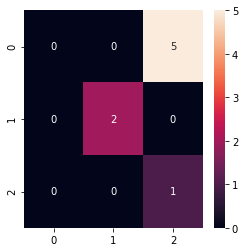

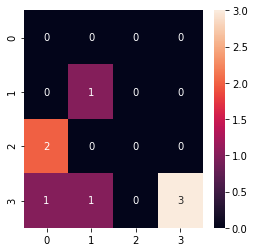

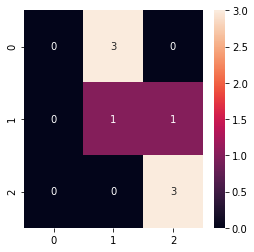

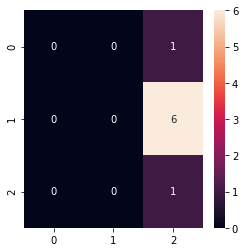

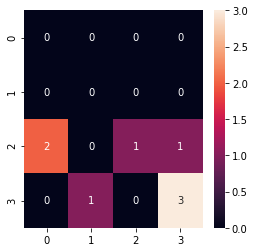

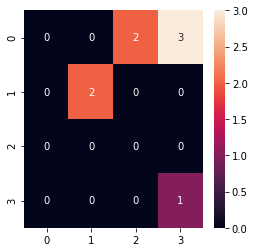

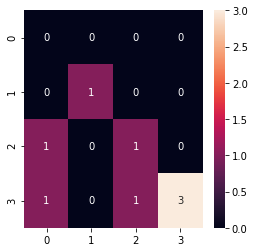

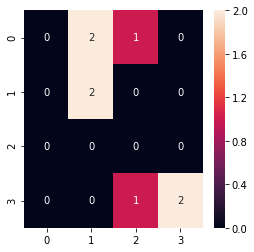

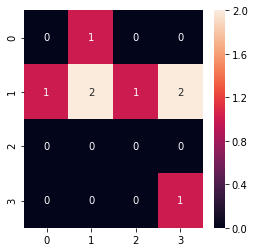

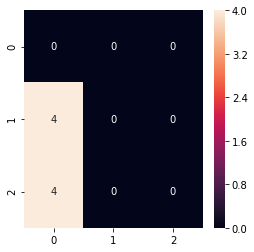

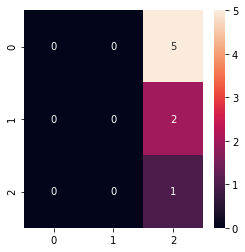

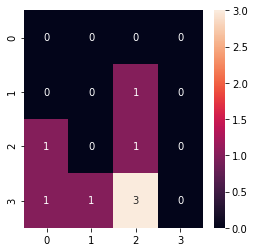

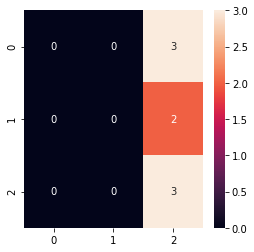

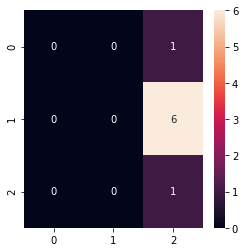

In [83]:
i=1
# if i==1:
# rbf kernel
clf = SVM('rbf')
acc_svm = cross_validation(w12_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==2:
# poly kernel
clf = SVM('poly')
acc_svm = cross_validation(w12_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==3:
# poly kernel
clf = SVM('linear')
acc_svm = cross_validation(w12_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==4:
# Adaboost  
clf = AdaBoost()
acc_adaboost = cross_validation(w12_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of AdaBoost is = %f' % acc_adaboost)
print('Best hyper-params for AdaBoost due to CV:')
print(clf.best_params_)
# elif i==5:
# Random forest 
clf = random_forest()
acc_forest = cross_validation(w12_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of RandomForest is = %f' % acc_forest)
print('Best hyper-params for RandomForest due to CV:')
print(clf.best_params_)
# elif i==6:
# KNN 
clf = KNN_clf()
acc_knn = cross_validation(w12_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of KNN is = %f' % acc_knn)
print('Best hyper-params for KNN due to CV:')
print(clf.best_params_)
# elif i==7:
# mlp 
clf = nn_clf()
acc_mlp = cross_validation(w12_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of MLP is = %f' % acc_mlp)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
clf=logisticregression()
acc_log = cross_validation(w12_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of logistic regression is = %f' % acc_log)
print('Best hyper-params for logistic regression due to CV:')
print(clf.best_params_)
# elif i==9:
clf=LDA()
acc_log = cross_validation(w12_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of linear discriminant analysis is = %f' % acc_log)
print('Best hyper-params for linear discriminant analysis due to CV:')
print(clf.best_params_)
# elif i==10:
clf=QDA()
acc_log = cross_validation(w12_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of quaadratic discriminant analysis is = %f' % acc_log)

<font font size=5, color='red'>window size = 20s:<br>

In [84]:
v=w20_data[0,:,:].reshape(-1)
for i in range(1,40):
    v=np.vstack((v,w20_data[i,:,:].reshape(-1)))
w20_data_X1 = np.copy(v)
w20_data_Y1 = y
print('target 1:', w20_data_X1.shape)
print('label 1:', w20_data_Y1.shape)

target 1: (40, 480)
label 1: (40,)


In [0]:
w20_data_kb_X1 = kbest(10, w20_data_X1, w20_data_Y1)
w20_data_kb_normal_X1 = data_cleaning(w20_data_kb_X1)


Accuracy of SVM is = 0.575000
Best hyper-params for SVM due to CV:
{'C': 10, 'gamma': 1}

Accuracy of SVM is = 0.525000
Best hyper-params for SVM due to CV:
{'C': 0.001, 'gamma': 101}

Accuracy of SVM is = 0.625000
Best hyper-params for SVM due to CV:
{'C': 100, 'gamma': 0}

Accuracy of AdaBoost is = 0.375000
Best hyper-params for AdaBoost due to CV:
{'n_estimators': 50}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of RandomForest is = 0.500000
Best hyper-params for RandomForest due to CV:
{'max_depth': 4, 'n_estimators': 20}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of KNN is = 0.550000
Best hyper-params for KNN due to CV:
{'n_neighbors': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr


Accuracy of MLP is = 0.375000
Best hyper-params for MLP due to CV:
{'hidden_layer_sizes': 30}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr


Accuracy of MLP is = 0.425000
Best hyper-params for MLP due to CV:
{'hidden_layer_sizes': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed


Accuracy of logistic regression is = 0.325000
Best hyper-params for logistic regression due to CV:
{'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/sklearn/covariance/empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened.


Accuracy of linear discriminant analysis is = 0.475000
Best hyper-params for linear discriminant analysis due to CV:
{'solver': 'lsqr'}


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/pyt


Accuracy of quaadratic discriminant analysis is = 0.150000


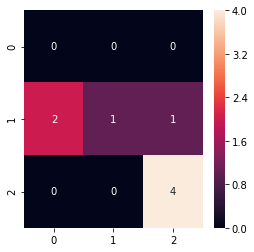

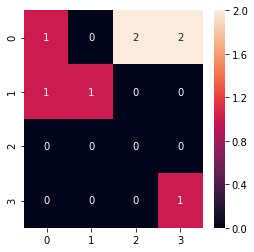

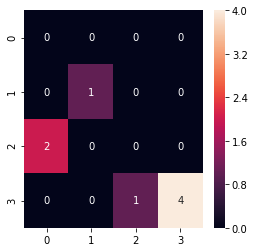

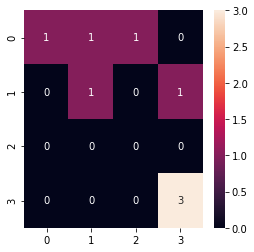

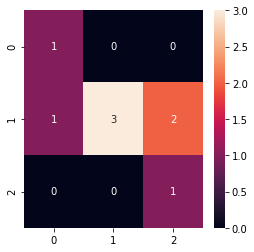

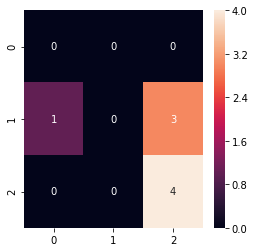

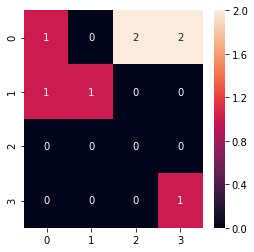

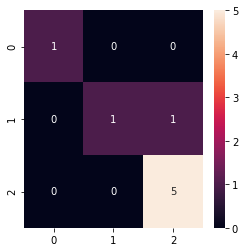

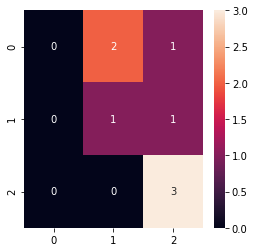

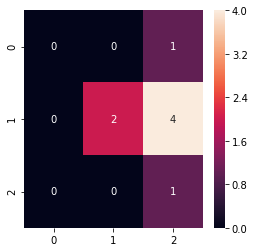

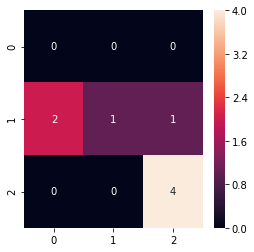

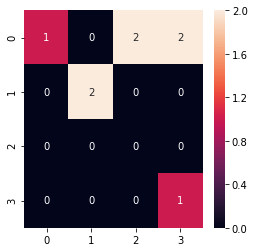

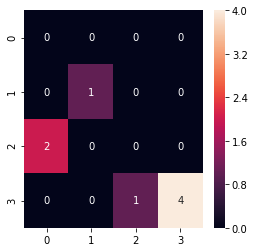

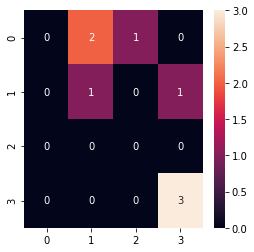

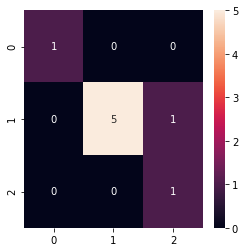

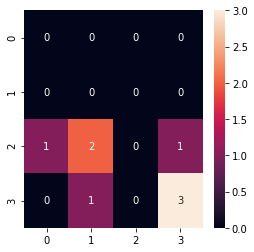

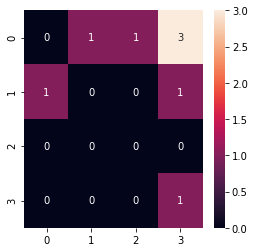

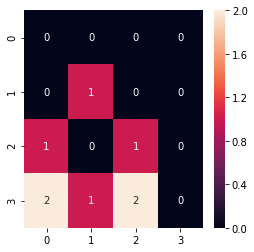

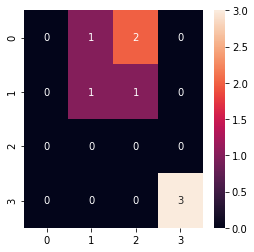

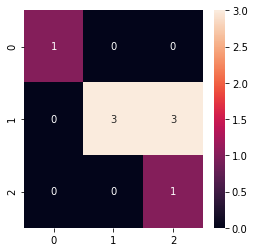

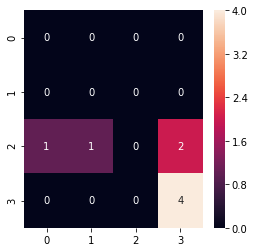

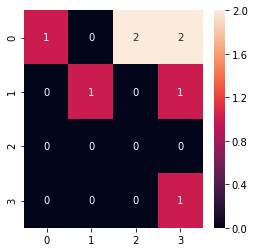

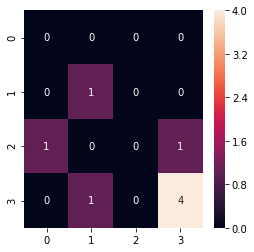

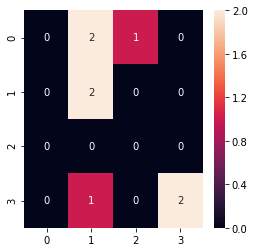

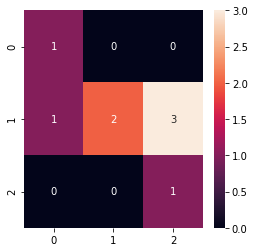

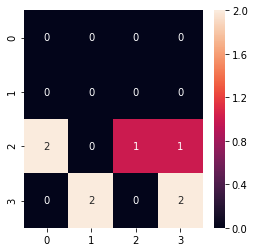

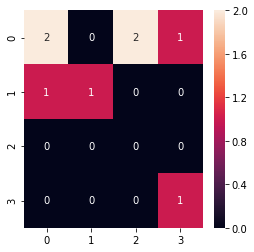

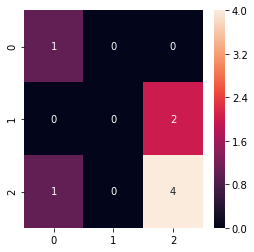

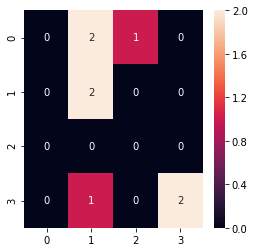

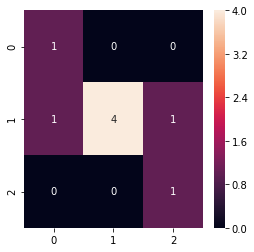

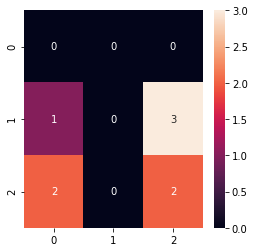

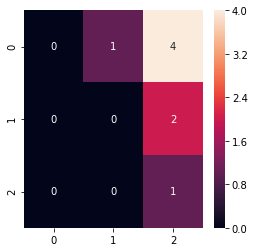

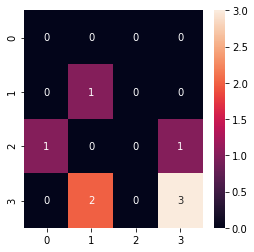

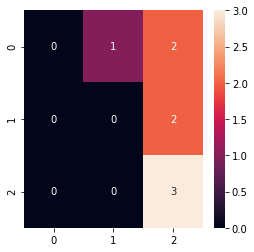

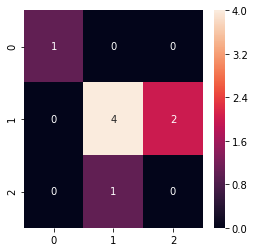

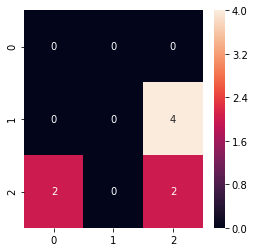

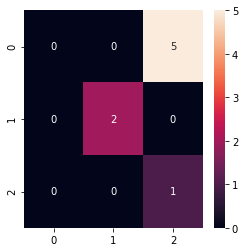

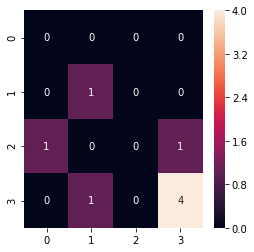

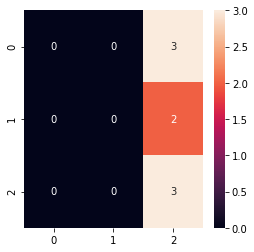

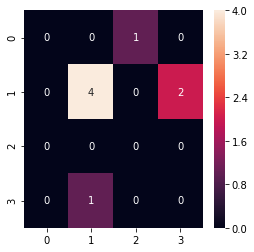

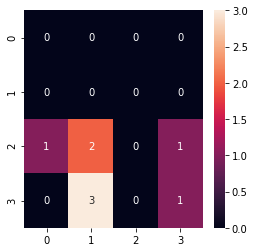

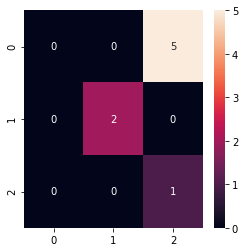

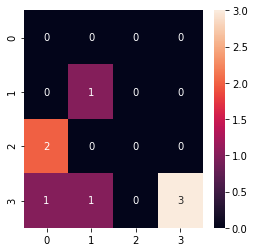

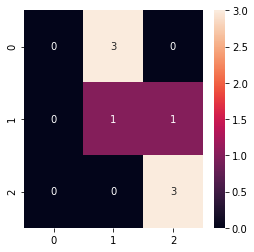

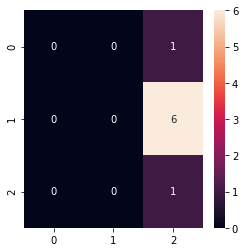

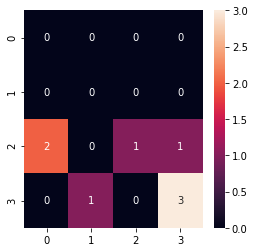

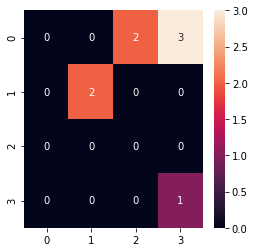

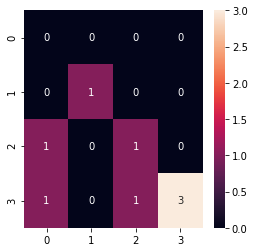

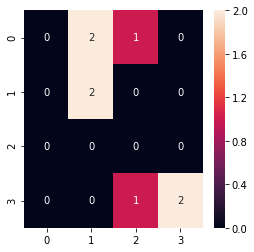

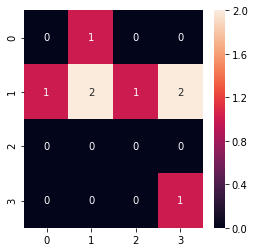

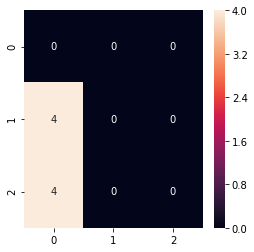

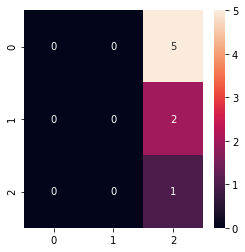

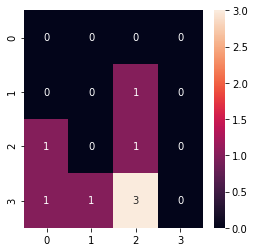

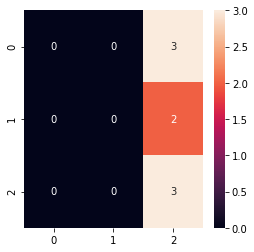

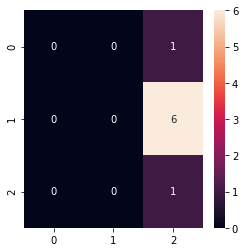

In [86]:
i=1
# if i==1:
# rbf kernel
clf = SVM('rbf')
acc_svm = cross_validation(w20_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==2:
# poly kernel
clf = SVM('poly')
acc_svm = cross_validation(w20_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==3:
# poly kernel
clf = SVM('linear')
acc_svm = cross_validation(w20_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==4:
# Adaboost  
clf = AdaBoost()
acc_adaboost = cross_validation(w20_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of AdaBoost is = %f' % acc_adaboost)
print('Best hyper-params for AdaBoost due to CV:')
print(clf.best_params_)
# elif i==5:
# Random forest 
clf = random_forest()
acc_forest = cross_validation(w20_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of RandomForest is = %f' % acc_forest)
print('Best hyper-params for RandomForest due to CV:')
print(clf.best_params_)
# elif i==6:
# KNN 
clf = KNN_clf()
acc_knn = cross_validation(w20_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of KNN is = %f' % acc_knn)
print('Best hyper-params for KNN due to CV:')
print(clf.best_params_)
# elif i==7:
# mlp 
clf = nn_clf()
acc_mlp = cross_validation(w20_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of MLP is = %f' % acc_mlp)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
# clf = nn_clf()
# acc_mlp = cross_validation(w20_data_kb_normal_X1,Y1,clf)
# print('\nAccuracy of MLP is = %f' % acc_mlp)
# print('Best hyper-params for MLP due to CV:')
# print(clf.best_params_)
clf=logisticregression()
acc_log = cross_validation(w20_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of logistic regression is = %f' % acc_log)
print('Best hyper-params for logistic regression due to CV:')
print(clf.best_params_)
# elif i==9:
clf=LDA()
acc_log = cross_validation(w20_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of linear discriminant analysis is = %f' % acc_log)
print('Best hyper-params for linear discriminant analysis due to CV:')
print(clf.best_params_)
# elif i==10:
clf=QDA()
acc_log = cross_validation(w20_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of quaadratic discriminant analysis is = %f' % acc_log)

<font font size=5, color='red'>window size = 8s:<br>

In [87]:
v=w8_data[0,:,:].reshape(-1)
for i in range(1,40):
    v=np.vstack((v,w8_data[i,:,:].reshape(-1)))
w8_data_X1 = np.copy(v)
w8_data_Y1 = y
print('target 1:', w8_data_X1.shape)
print('label 1:', w8_data_Y1.shape)

target 1: (40, 448)
label 1: (40,)


In [0]:
w8_data_kb_X1 = kbest(6, w8_data_X1, w8_data_Y1)
w8_data_kb_normal_X1 = data_cleaning(w8_data_kb_X1)


Accuracy of SVM is = 0.650000
Best hyper-params for SVM due to CV:
{'C': 100, 'gamma': 1}

Accuracy of SVM is = 0.550000
Best hyper-params for SVM due to CV:
{'C': 0.1, 'gamma': 101}

Accuracy of SVM is = 0.550000
Best hyper-params for SVM due to CV:
{'C': 100, 'gamma': 0}

Accuracy of AdaBoost is = 0.425000
Best hyper-params for AdaBoost due to CV:
{'n_estimators': 20}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of RandomForest is = 0.550000
Best hyper-params for RandomForest due to CV:
{'max_depth': 4, 'n_estimators': 10}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)


Accuracy of KNN is = 0.575000
Best hyper-params for KNN due to CV:
{'n_neighbors': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr


Accuracy of MLP is = 0.400000
Best hyper-params for MLP due to CV:
{'hidden_layer_sizes': 10}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed


Accuracy of logistic regression is = 0.350000
Best hyper-params for logistic regression due to CV:
{'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/covariance/empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/sklearn/covariance/empirical_covariance_.py:75: UserWarning: Only one sample ava


Accuracy of linear discriminant analysis is = 0.525000
Best hyper-params for linear discriminant analysis due to CV:
{'solver': 'svd'}


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/pyt


Accuracy of quaadratic discriminant analysis is = 0.450000


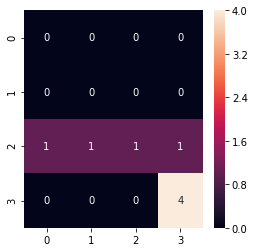

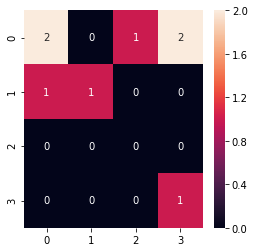

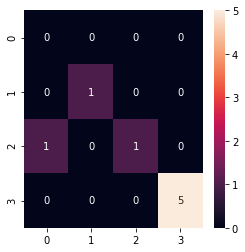

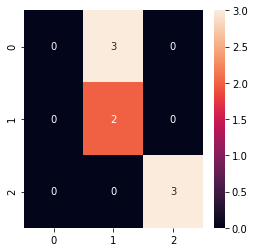

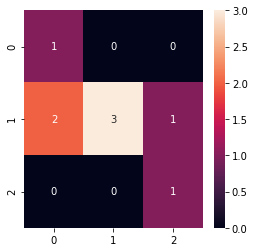

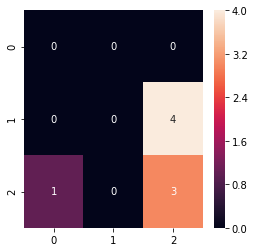

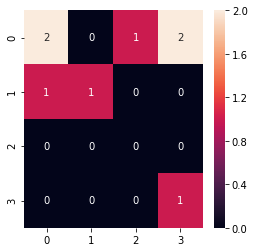

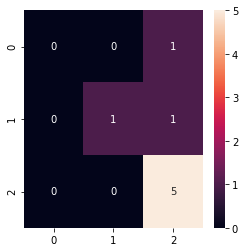

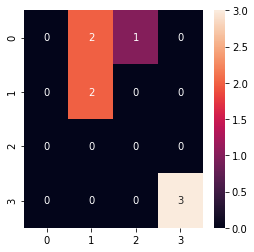

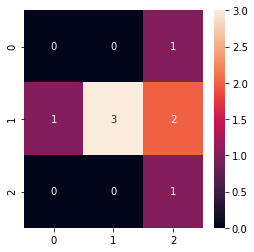

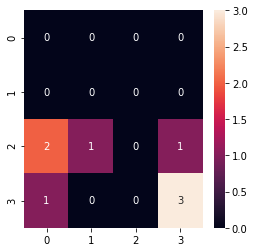

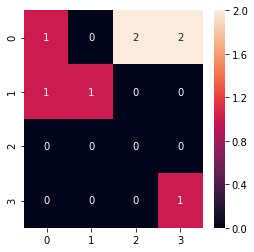

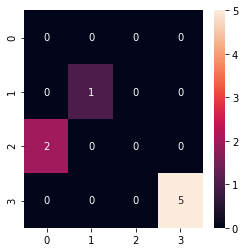

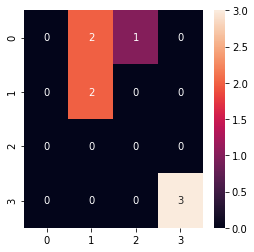

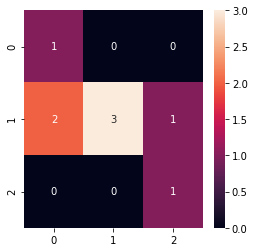

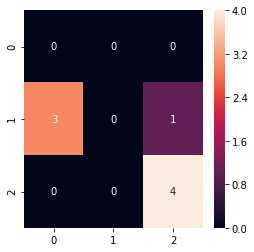

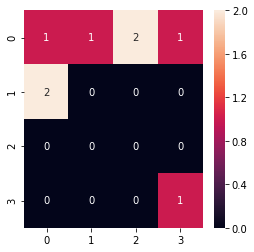

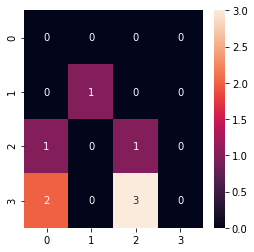

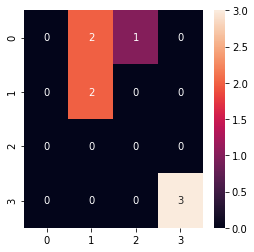

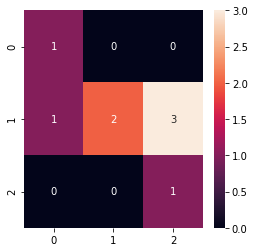

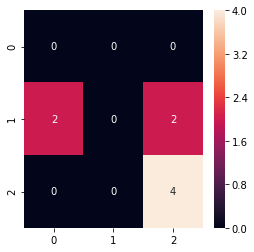

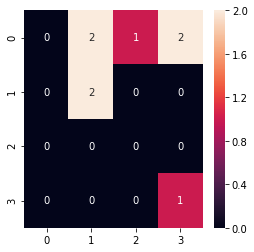

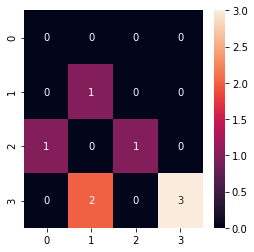

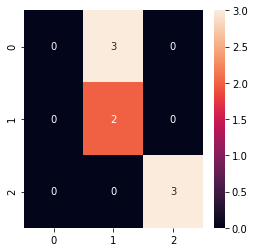

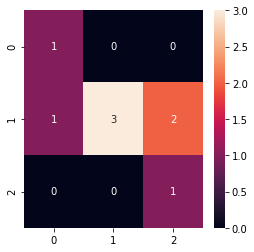

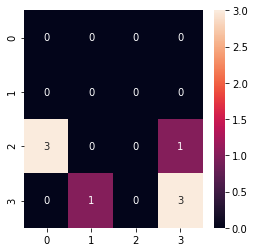

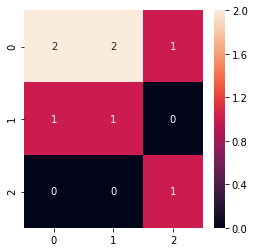

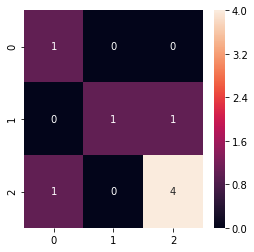

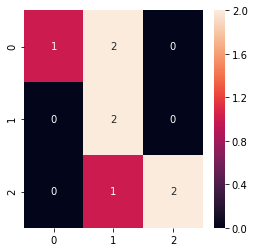

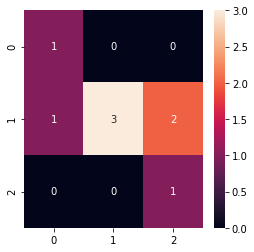

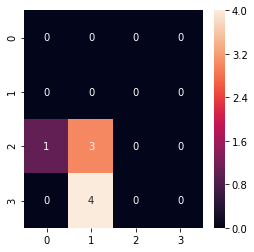

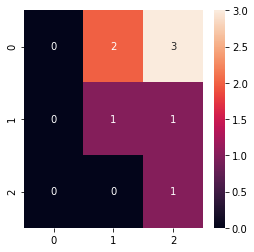

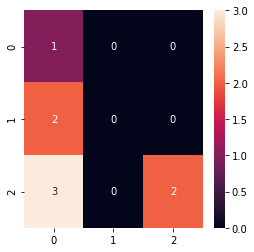

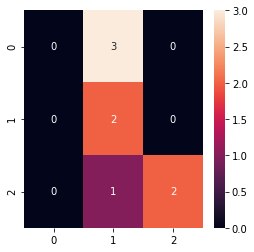

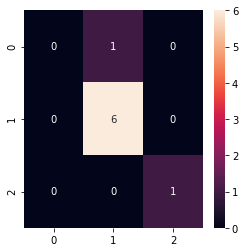

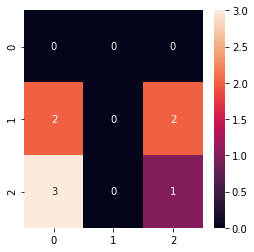

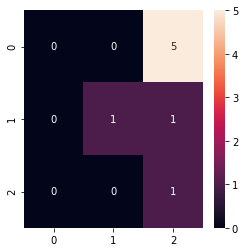

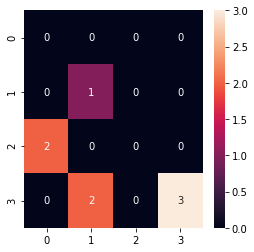

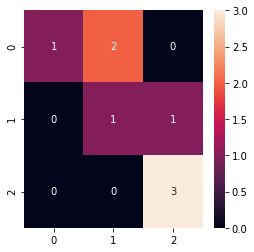

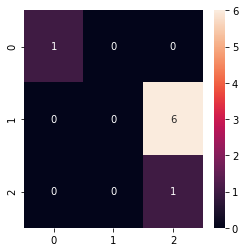

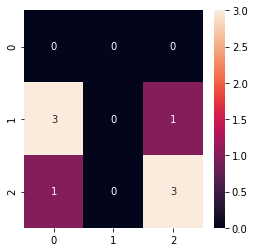

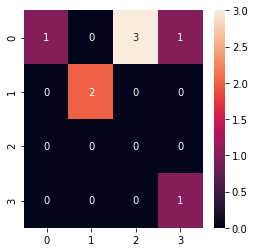

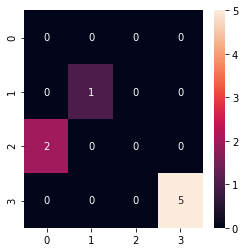

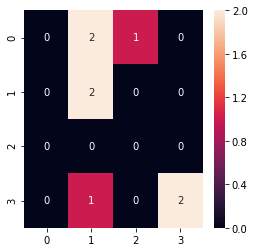

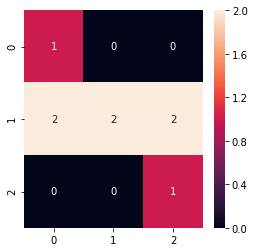

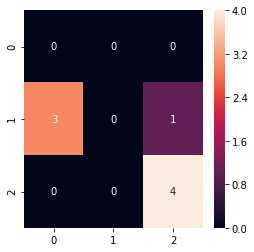

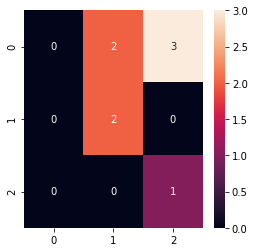

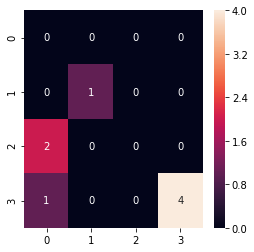

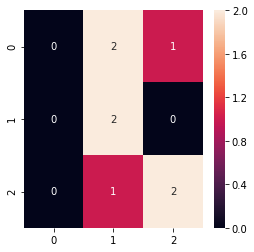

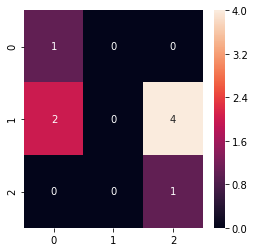

In [89]:
i=1
# if i==1:
# rbf kernel
clf = SVM('rbf')
acc_svm = cross_validation(w8_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==2:
# poly kernel
clf = SVM('poly')
acc_svm = cross_validation(w8_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==3:
# poly kernel
clf = SVM('linear')
acc_svm = cross_validation(w8_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of SVM is = %f' % acc_svm)
print('Best hyper-params for SVM due to CV:')
print(clf.best_params_)
# elif i==4:
# Adaboost  
clf = AdaBoost()
acc_adaboost = cross_validation(w8_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of AdaBoost is = %f' % acc_adaboost)
print('Best hyper-params for AdaBoost due to CV:')
print(clf.best_params_)
# elif i==5:
# Random forest 
clf = random_forest()
acc_forest = cross_validation(w8_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of RandomForest is = %f' % acc_forest)
print('Best hyper-params for RandomForest due to CV:')
print(clf.best_params_)
# elif i==6:
# KNN 
clf = KNN_clf()
acc_knn = cross_validation(w8_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of KNN is = %f' % acc_knn)
print('Best hyper-params for KNN due to CV:')
print(clf.best_params_)
# elif i==7:
# mlp 
clf = nn_clf()
acc_mlp = cross_validation(w8_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of MLP is = %f' % acc_mlp)
print('Best hyper-params for MLP due to CV:')
print(clf.best_params_)
clf=logisticregression()
acc_log = cross_validation(w8_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of logistic regression is = %f' % acc_log)
print('Best hyper-params for logistic regression due to CV:')
print(clf.best_params_)
# elif i==9:
clf=LDA()
acc_log = cross_validation(w8_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of linear discriminant analysis is = %f' % acc_log)
print('Best hyper-params for linear discriminant analysis due to CV:')
print(clf.best_params_)
# elif i==10:
clf=QDA()
acc_log = cross_validation(w8_data_kb_normal_X1,Y1,clf)
print('\nAccuracy of quaadratic discriminant analysis is = %f' % acc_log)